# Info
Purpose:

    To build and analyse retrieval of aerosol layer heigth from oxygen-A band, using MYSTIC libradtran calculations

Input:

    None

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - Run_libradtran

Needed Files:
  - libradtran input and output files separately built.

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2022-03-22
    Modified:


# Prepare python environment

In [21]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import Run_libradtran as RL

In [407]:
name = 'aero_oxa'
vv = 'v2_mystic_sunp'
fp = getpath(name)


Return path named:  aero_oxa /data/sam/aero_oxa/


In [682]:
#fp = '/data/sam/ORACLES/'
fp_rtm = '/scratch/rtm/'
fp_uvspec = '/home/sam/libradtran/libRadtran-2.0.2b/bin/uvspec'
fp_rtmdat = '/scratch/rtm/dat/' #'/u/sleblan2/4STAR/rtm_dat/'

# Setup defaults

In [447]:
aodv = 0.3

In [414]:
sza = 45.0

In [466]:
aero = lu.load_from_json(getpath('ORACLES')+'aero_file_v4.txt')
aero['ext'] = aero['ext']*aodv/aero['ext'][0,3]/(aero['z_arr'][1]-aero['z_arr'][0])

Return path named:  ORACLES /data/sam/ORACLES/


In [758]:
aero.keys()

dict_keys(['wvl_arr', 'disort_phase', 'asy', 'ext', 'expand_hg', 'z_arr', 'ssa', 'file_name', 'filename'])

In [760]:
aero['asy']

array([[0.75      , 0.71      , 0.69      , 0.645     , 0.58      ,
        0.52      , 0.512     , 0.51      , 0.49      , 0.45      ,
        0.427843  , 0.377843  ],
       [0.713289  , 0.68328872, 0.66672784, 0.64227709, 0.62344345,
        0.62167625, 0.62605761, 0.62786658, 0.6320782 , 0.52784278,
        0.427843  , 0.377843  ]])

In [469]:
aero['z_arr']

[2.0, 5.0]

In [473]:
f_slit_vis = os.path.join(fp_rtmdat,'4STAR_vis_slit_1nm.dat')
f_slit_nir = os.path.join(fp_rtmdat,'4STAR_nir_slit_1nm.dat')

In [486]:
from importlib import reload

In [612]:
reload(RL)

<module 'Run_libradtran' from '/home/sam/python_codes/Run_libradtran.py'>

In [613]:
umus = np.cos(np.arange(sza-3.0,sza+3.0+1)*np.pi/180.0)*-1.0

In [757]:
np.cos(30.0*np.pi/180.0)

0.8660254037844387

In [614]:
geo = {'doy':225,
       'zout':[0.2,1.0,100.0],
       'sza':sza}
#aero = {'z_arr':[2.0,5.0],
#        'ext':np.array([[0.6,0.4,0.10,0.04],[0.0,0.0,0.0,0.0]]),
#        'ssa':np.array([[0.8,0.85,0.9,0.95],[0.9,0.9,0.9,0.9]]),
#        'asy':np.array([[0.8,0.8,0.8,0.8],[0.8,0.8,0.8,0.8]]),
#        'wvl_arr':[400.0,500.0,650.0,940.0],
#        'disort_phase':False,
#        'expand_hg':True}
source = {'wvl_range':[750,775],
          'source':'solar',
          'integrate_values':False,
          'run_fuliou':False,
          'dat_path':'/home/sam/libradtran/libRadtran-2.0.2/data/',
          'atm_file':fp_rtmdat+'atmos_20170815.dat',
          'slit_file':f_slit_vis,
          'zenith':False,
          'umu':umus[0],
          'mc_rad_alpha':1.2}
albedo = {'create_albedo_file':False,
          'sea_surface_albedo':False,
          'albedo':0.582}

In [615]:
RL.print_version_details(fp+'aero_oxa_%s.txt'%vv,vv,geo=geo,
                         aero=aero,cloud=None,source=source,albedo=albedo,
                         tau=None,ref=None,sza=sza)

In [616]:
fp_in = os.path.join(fp_rtm,'input','%s'%vv)
fp_out = os.path.join(fp_rtm,'output','%s'%vv)

In [617]:
zs = np.arange(0.2,4.2,0.2)
z_arrs = np.array([zs.T,zs.T+3.0]).T
nz = len(z_arrs)

In [618]:
z_arrs, nz

(array([[0.2, 3.2],
        [0.4, 3.4],
        [0.6, 3.6],
        [0.8, 3.8],
        [1. , 4. ],
        [1.2, 4.2],
        [1.4, 4.4],
        [1.6, 4.6],
        [1.8, 4.8],
        [2. , 5. ],
        [2.2, 5.2],
        [2.4, 5.4],
        [2.6, 5.6],
        [2.8, 5.8],
        [3. , 6. ],
        [3.2, 6.2],
        [3.4, 6.4],
        [3.6, 6.6],
        [3.8, 6.8],
        [4. , 7. ]]),
 20)

# Write out input files

In [762]:
aero['z_arr']
source['slit_file'] = f_slit_vis
aero['file_name'] = None

In [763]:
sza_arr = np.arange(10,81,10)

In [621]:
if not os.path.exists(fp_in):
    os.makedirs(fp_in)
if not os.path.exists(fp_out):
    os.makedirs(fp_out)

In [764]:
f_list = open(os.path.join(fp_rtm,'input',vv,'{}_list.sh'.format(name)),'w')
print(f_list.name)

/scratch/rtm/input/v2_mystic_sunp/aero_oxa_list.sh


In [765]:
for z in z_arrs:
    aero['z_arr'] = z
    for za in sza_arr:
        geo['sza'] = za
        for iu,u in enumerate(umus):
            fname = 'sun_oxa_aod{:02.0f}km_sza{:02.0f}_mu{:1.0f}.dat'.format(z[0]*10,za,iu)
            source['umu'] = [(np.cos(np.arange(za-3.0,za+3.0+1)*np.pi/180.0)*-1.0)[iu]]
            source['mc_basename'] = \
                os.path.join(fp_out,'mc_sun_oxa_aod{:02.0f}km_sza{:02.0f}_mu{:1.0f}'.format(z[0]*10,za,iu))
            RL.write_input_aac(os.path.join(fp_in,fname),geo=geo,aero=aero,cloud={},source=source,albedo=albedo,
                               verbose=False,make_base=False,set_quiet=True,solver='mystic')
            f_list.write(fp_uvspec+' < '+os.path.join(fp_in,fname)+' > '+os.path.join(fp_out,fname)+'\n')
            aero['file_name'] = None
            print(fname)

sun_oxa_aod02km_sza10_mu0.dat
sun_oxa_aod02km_sza10_mu1.dat
sun_oxa_aod02km_sza10_mu2.dat
sun_oxa_aod02km_sza10_mu3.dat
sun_oxa_aod02km_sza10_mu4.dat
sun_oxa_aod02km_sza10_mu5.dat
sun_oxa_aod02km_sza10_mu6.dat
sun_oxa_aod02km_sza20_mu0.dat
sun_oxa_aod02km_sza20_mu1.dat
sun_oxa_aod02km_sza20_mu2.dat
sun_oxa_aod02km_sza20_mu3.dat
sun_oxa_aod02km_sza20_mu4.dat
sun_oxa_aod02km_sza20_mu5.dat
sun_oxa_aod02km_sza20_mu6.dat
sun_oxa_aod02km_sza30_mu0.dat
sun_oxa_aod02km_sza30_mu1.dat
sun_oxa_aod02km_sza30_mu2.dat
sun_oxa_aod02km_sza30_mu3.dat
sun_oxa_aod02km_sza30_mu4.dat
sun_oxa_aod02km_sza30_mu5.dat
sun_oxa_aod02km_sza30_mu6.dat
sun_oxa_aod02km_sza40_mu0.dat
sun_oxa_aod02km_sza40_mu1.dat
sun_oxa_aod02km_sza40_mu2.dat
sun_oxa_aod02km_sza40_mu3.dat
sun_oxa_aod02km_sza40_mu4.dat
sun_oxa_aod02km_sza40_mu5.dat
sun_oxa_aod02km_sza40_mu6.dat
sun_oxa_aod02km_sza50_mu0.dat
sun_oxa_aod02km_sza50_mu1.dat
sun_oxa_aod02km_sza50_mu2.dat
sun_oxa_aod02km_sza50_mu3.dat
sun_oxa_aod02km_sza50_mu4.dat
sun_oxa_ao

sun_oxa_aod14km_sza10_mu4.dat
sun_oxa_aod14km_sza10_mu5.dat
sun_oxa_aod14km_sza10_mu6.dat
sun_oxa_aod14km_sza20_mu0.dat
sun_oxa_aod14km_sza20_mu1.dat
sun_oxa_aod14km_sza20_mu2.dat
sun_oxa_aod14km_sza20_mu3.dat
sun_oxa_aod14km_sza20_mu4.dat
sun_oxa_aod14km_sza20_mu5.dat
sun_oxa_aod14km_sza20_mu6.dat
sun_oxa_aod14km_sza30_mu0.dat
sun_oxa_aod14km_sza30_mu1.dat
sun_oxa_aod14km_sza30_mu2.dat
sun_oxa_aod14km_sza30_mu3.dat
sun_oxa_aod14km_sza30_mu4.dat
sun_oxa_aod14km_sza30_mu5.dat
sun_oxa_aod14km_sza30_mu6.dat
sun_oxa_aod14km_sza40_mu0.dat
sun_oxa_aod14km_sza40_mu1.dat
sun_oxa_aod14km_sza40_mu2.dat
sun_oxa_aod14km_sza40_mu3.dat
sun_oxa_aod14km_sza40_mu4.dat
sun_oxa_aod14km_sza40_mu5.dat
sun_oxa_aod14km_sza40_mu6.dat
sun_oxa_aod14km_sza50_mu0.dat
sun_oxa_aod14km_sza50_mu1.dat
sun_oxa_aod14km_sza50_mu2.dat
sun_oxa_aod14km_sza50_mu3.dat
sun_oxa_aod14km_sza50_mu4.dat
sun_oxa_aod14km_sza50_mu5.dat
sun_oxa_aod14km_sza50_mu6.dat
sun_oxa_aod14km_sza60_mu0.dat
sun_oxa_aod14km_sza60_mu1.dat
sun_oxa_ao

sun_oxa_aod22km_sza80_mu6.dat
sun_oxa_aod24km_sza10_mu0.dat
sun_oxa_aod24km_sza10_mu1.dat
sun_oxa_aod24km_sza10_mu2.dat
sun_oxa_aod24km_sza10_mu3.dat
sun_oxa_aod24km_sza10_mu4.dat
sun_oxa_aod24km_sza10_mu5.dat
sun_oxa_aod24km_sza10_mu6.dat
sun_oxa_aod24km_sza20_mu0.dat
sun_oxa_aod24km_sza20_mu1.dat
sun_oxa_aod24km_sza20_mu2.dat
sun_oxa_aod24km_sza20_mu3.dat
sun_oxa_aod24km_sza20_mu4.dat
sun_oxa_aod24km_sza20_mu5.dat
sun_oxa_aod24km_sza20_mu6.dat
sun_oxa_aod24km_sza30_mu0.dat
sun_oxa_aod24km_sza30_mu1.dat
sun_oxa_aod24km_sza30_mu2.dat
sun_oxa_aod24km_sza30_mu3.dat
sun_oxa_aod24km_sza30_mu4.dat
sun_oxa_aod24km_sza30_mu5.dat
sun_oxa_aod24km_sza30_mu6.dat
sun_oxa_aod24km_sza40_mu0.dat
sun_oxa_aod24km_sza40_mu1.dat
sun_oxa_aod24km_sza40_mu2.dat
sun_oxa_aod24km_sza40_mu3.dat
sun_oxa_aod24km_sza40_mu4.dat
sun_oxa_aod24km_sza40_mu5.dat
sun_oxa_aod24km_sza40_mu6.dat
sun_oxa_aod24km_sza50_mu0.dat
sun_oxa_aod24km_sza50_mu1.dat
sun_oxa_aod24km_sza50_mu2.dat
sun_oxa_aod24km_sza50_mu3.dat
sun_oxa_ao

sun_oxa_aod36km_sza10_mu3.dat
sun_oxa_aod36km_sza10_mu4.dat
sun_oxa_aod36km_sza10_mu5.dat
sun_oxa_aod36km_sza10_mu6.dat
sun_oxa_aod36km_sza20_mu0.dat
sun_oxa_aod36km_sza20_mu1.dat
sun_oxa_aod36km_sza20_mu2.dat
sun_oxa_aod36km_sza20_mu3.dat
sun_oxa_aod36km_sza20_mu4.dat
sun_oxa_aod36km_sza20_mu5.dat
sun_oxa_aod36km_sza20_mu6.dat
sun_oxa_aod36km_sza30_mu0.dat
sun_oxa_aod36km_sza30_mu1.dat
sun_oxa_aod36km_sza30_mu2.dat
sun_oxa_aod36km_sza30_mu3.dat
sun_oxa_aod36km_sza30_mu4.dat
sun_oxa_aod36km_sza30_mu5.dat
sun_oxa_aod36km_sza30_mu6.dat
sun_oxa_aod36km_sza40_mu0.dat
sun_oxa_aod36km_sza40_mu1.dat
sun_oxa_aod36km_sza40_mu2.dat
sun_oxa_aod36km_sza40_mu3.dat
sun_oxa_aod36km_sza40_mu4.dat
sun_oxa_aod36km_sza40_mu5.dat
sun_oxa_aod36km_sza40_mu6.dat
sun_oxa_aod36km_sza50_mu0.dat
sun_oxa_aod36km_sza50_mu1.dat
sun_oxa_aod36km_sza50_mu2.dat
sun_oxa_aod36km_sza50_mu3.dat
sun_oxa_aod36km_sza50_mu4.dat
sun_oxa_aod36km_sza50_mu5.dat
sun_oxa_aod36km_sza50_mu6.dat
sun_oxa_aod36km_sza60_mu0.dat
sun_oxa_ao

In [766]:
f_list.close()

## Run the files

In [686]:
flist = os.path.join(fp_rtm,'input',vv,'{}_list.sh'.format(name))

In [687]:
!wc -l $flist

1120 /scratch/rtm/input/v2_mystic_sunp/aero_oxa_list.sh


In [681]:
!parallel --jobs=22 --bar < $flist #2> $f_listout

/bin/bash: $f_list: ambiguous redirect


# Read the output files

In [688]:
n = len(z_arrs)
nz = len(geo['zout'])
wvl = np.arange(source['wvl_range'][0],source['wvl_range'][1]+1)
nw = len(wvl)

In [698]:
umu = source['umu']
numu = len(umus)
zout = geo['zout']

In [690]:
if 'v1' in vv:
    rad = np.zeros((n,nw,nz,numu-1))+np.nan

    for i,z in enumerate(z_arrs):
        fname = 'sun_oxa_aod{:02.0f}km.dat'.format(z[0]*10)
        o = RL.read_libradtran(os.path.join(fp_out,fname),zout=geo['zout'],num_rad=numu,use_mystic=True)
        rad[i,:,:,:] = o['rad']

In [700]:
if 'v2' in vv:
    rad = np.zeros((n,nw,zout_len,numu,len(sza_arr)))+np.nan
    umu_arr = np.zeros((len(sza_arr),numu))+np.nan

    for i,z in enumerate(z_arrs):
        for ia,za in enumerate(sza_arr):
            umu_arr[ia,:] = np.cos(np.arange(za-3.0,za+3.0+1)*np.pi/180.0)*-1.0
            for iu,u in enumerate(umus):
                fname = 'mc_sun_oxa_aod{:02.0f}km_sza{:02.0f}_mu{:1.0f}.rad.spc'.format(z[0]*10,za,iu)
                o = RL.read_libradtran(os.path.join(fp_out,fname),zout=geo['zout'],use_mystic=True)
                rad[i,:,:,iu,ia] = o['rad']
    umu = umu_arr
    sza = sza_arr

## Save the output

In [669]:
from datetime import datetime 

In [670]:
str(datetime.now())

'2022-03-30 13:07:04.748081'

In [701]:
d = {'wvl':wvl,'umu':umu,'zout':zout,'sza':sza,'rad':rad,'z_arrs':z_arrs,'vv':vv,'created_on':'{}'.format(datetime.now())}

In [702]:
sio.savemat(fp+'{}.mat'.format(vv),d)

# Plot out the radiances

In [703]:
umu[1]

array([-0.95630476, -0.95105652, -0.94551858, -0.93969262, -0.93358043,
       -0.92718385, -0.92050485])

<IPython.core.display.Javascript object>


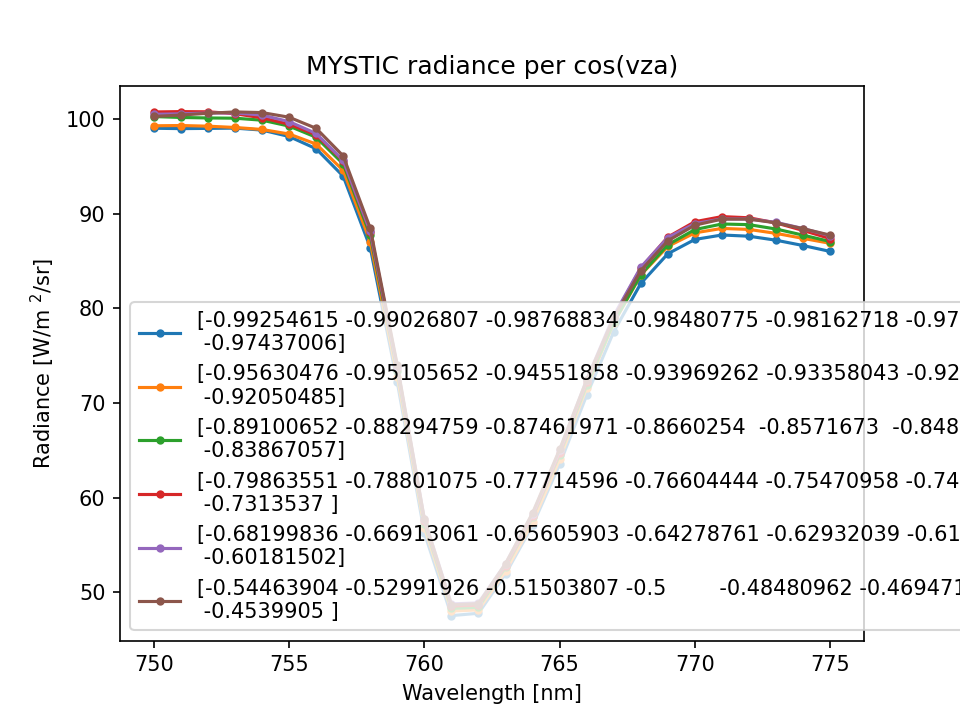

Text(0.5, 1.0, 'MYSTIC radiance per cos(vza)')

In [704]:
plt.figure()
for i in range(numu-1):
    plt.plot(wvl,rad[0,:,0,i,0],'.-',label='{}'.format(umu[i]))
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Radiance [W/m $^2$/sr]')
plt.title('MYSTIC radiance per cos(vza)')

In [180]:
plt.cm.gist_rainbow(n+1)

(1.0, 0.2829888712241654, 0.0, 1.0)

<IPython.core.display.Javascript object>


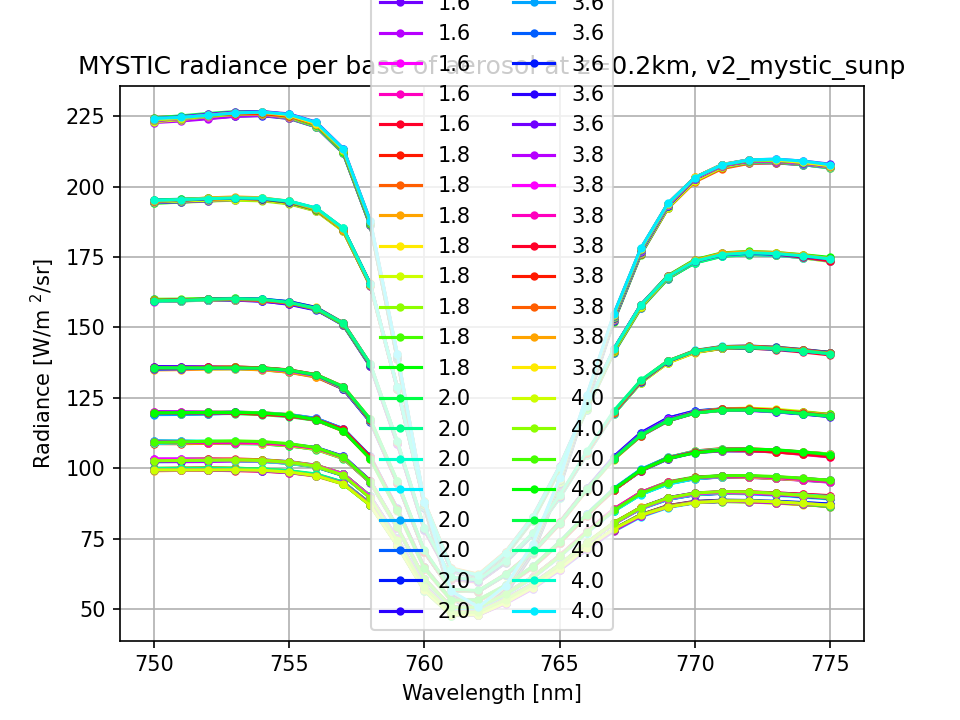

In [705]:
iz = 0
iu = 1
fig,ax = plt.subplots(1)
ax.set_prop_cycle(color=[plt.cm.gist_rainbow(ii) for ii in np.linspace(0,1,n+1)])
for i in range(n):
    plt.plot(wvl,rad[i,:,iz,iu],'.-',label='{:01.1f}'.format(z_arrs[i,0]))
plt.legend(title='aero base alt [km]',ncol=2)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Radiance [W/m $^2$/sr]')
plt.grid()
plt.title('MYSTIC radiance per base of aerosol at z={:02.1}km, {}'.format(zout[iz],vv))
plt.savefig(fp+'OXA_spectra_per_base_{}.png'.format(vv),dpi=300,transparent=True)

In [708]:
rad.shape

(20, 26, 3, 7, 8)

In [709]:
len(sza_arr)

8

<IPython.core.display.Javascript object>


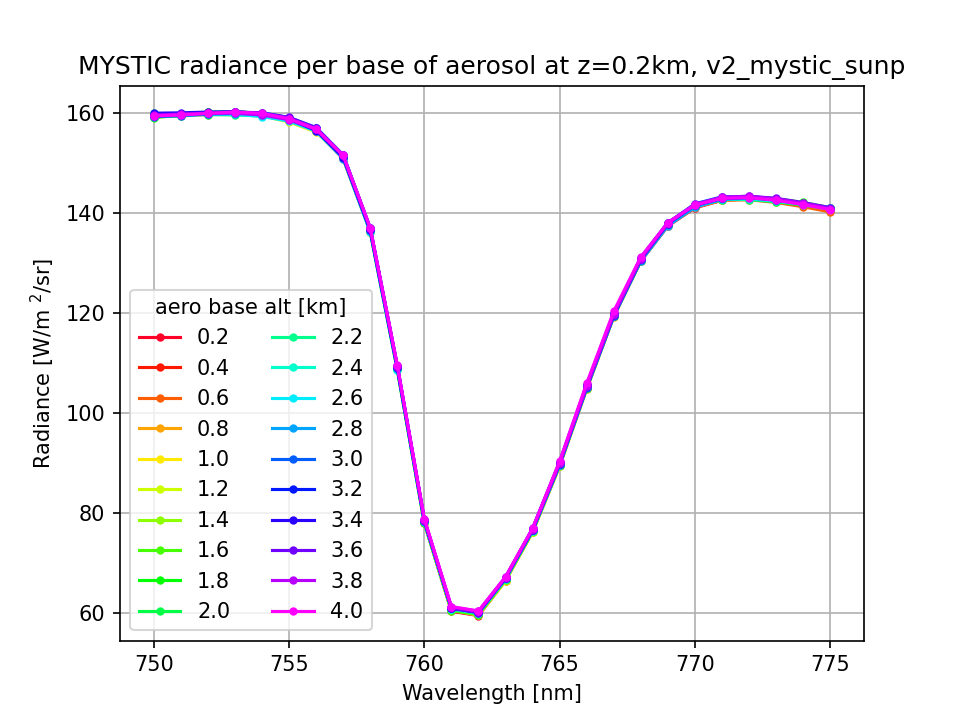

In [718]:
iz = 0
iu = 1
ia = 5
fig,ax = plt.subplots(1)
ax.set_prop_cycle(color=[plt.cm.gist_rainbow(ii) for ii in np.linspace(0,1,n+1)])
for i in range(n):
    plt.plot(wvl,rad[i,:,iz,iu,ia],'.-',label='{:01.1f}'.format(z_arrs[i,0]))
plt.legend(title='aero base alt [km]',ncol=2)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Radiance [W/m $^2$/sr]')
plt.grid()
plt.title('MYSTIC radiance per base of aerosol at z={:02.1}km, {}'.format(zout[iz],vv))
plt.savefig(fp+'OXA_spectra_per_base_{}.png'.format(vv),dpi=300,transparent=True)

In [744]:
rad.shape

(20, 26, 3, 7, 8)

In [752]:
vza = np.arange(-3,4,1)

In [753]:
vza

array([-3, -2, -1,  0,  1,  2,  3])

<IPython.core.display.Javascript object>


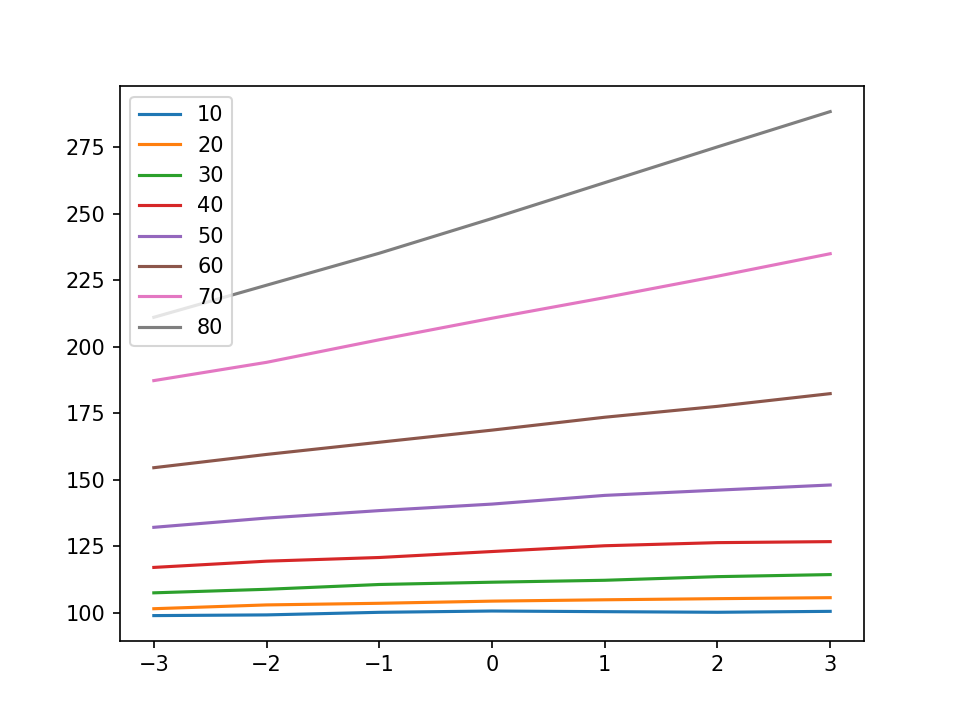

In [756]:
plt.figure()
plt.plot(vza,rad[0,0,0,:,:],label=[str(za) for za in sza_arr])
plt.legend()

# Calculate the Ox-a depth

In [210]:
from scipy import interpolate

In [216]:
def oxa_depth_v2(w,spec):
    'calculate the oxygen-a depth. w: wavelenght in microns, spec: spectra(tau_aero)'
    w = np.array(w).flatten()
    y0 = np.argmin(abs(w-0.756))
    y1 = np.argmin(abs(w-0.772))
    oxa_flat,oxa_ratio,oxa_ratio2,oxa_delta = [],[],[],[]
    for i in range(len(spec)):
        fx = interpolate.interp1d(w[[y0,y1]],spec[i,[y0,y1]])
        oxa_flat.append(fx(w[y0:y1]))
        oxa_delta.append(np.nansum(spec[i,y0:y1]-oxa_flat))
        oxa_ratio.append(np.nansum(spec[i,y0:y1]/oxa_flat))
        oxa_ratio2.append(np.nanmean(spec[i,y0:y1]/oxa_flat))
    return np.array(oxa_delta),np.array(oxa_ratio),np.array(oxa_ratio2)

In [1003]:
def oxa_depth_v3(w,spec):
    'calculate the oxygen-a depth. w: wavelenght in microns, spec: spectra(tau_aero)'
    w = w.flatten()
    y0 = np.argmin(abs(w-0.756))
    y1 = np.argmin(abs(w-0.772))
    ym = np.argmin(abs(w-0.761))
    oxa_flat = [(s[y1]-s[y0])/(w[y1]-w[y0])*(w[y0:y1]-w[y0])+s[y0] for s in spec]
    oxa_delta = np.array([np.nansum(s[y0:y1]-oxa_flat[i]) for i,s in enumerate(spec)])
    oxa_ratio = np.array([np.nansum(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
    oxa_ratio2 = np.array([np.nanmean(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
    oxa_depthr = np.array([s[ym]/oxa_flat[i][ym-y0] for i,s in enumerate(spec)])
    oxa_depthm = np.array([s[ym]-oxa_flat[i][ym-y0] for i,s in enumerate(spec)])
    return oxa_delta,oxa_ratio,oxa_ratio2,oxa_depthr,oxa_depthm

## based on 1 sza, v1

### From radiance

In [438]:
zout

[0.2, 1.0, 100.0]

In [439]:
oxa_rad_delta = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_rad_ratio = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_rad_ratio2 = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_rad_depthr = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_rad_depthm = np.zeros((n,len(zout),len(umu)-1))+np.nan
for i in range(n):
    for iz,z in enumerate(zout):
        oxa_rad_delta[i,iz,:], oxa_rad_ratio[i,iz,:], oxa_rad_ratio2[i,iz,:] = oxa_depth_v2(wvl/1000.0,rad[i,:,iz,:].T)

<ipython-input-216-ae2fcebc8aed>:11: RuntimeWarning: invalid value encountered in true_divide
  oxa_ratio.append(np.nansum(spec[i,y0:y1]/oxa_flat))
<ipython-input-216-ae2fcebc8aed>:12: RuntimeWarning: invalid value encountered in true_divide
  oxa_ratio2.append(np.nanmean(spec[i,y0:y1]/oxa_flat))
<ipython-input-216-ae2fcebc8aed>:11: RuntimeWarning: divide by zero encountered in true_divide
  oxa_ratio.append(np.nansum(spec[i,y0:y1]/oxa_flat))
<ipython-input-216-ae2fcebc8aed>:12: RuntimeWarning: divide by zero encountered in true_divide
  oxa_ratio2.append(np.nanmean(spec[i,y0:y1]/oxa_flat))


In [440]:
oxa_rad_delta = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_rad_ratio = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_rad_ratio2 = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_rad_depthr = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_rad_depthm = np.zeros((n,len(zout),len(umu)-1))+np.nan
for i in range(n):
    for iz,z in enumerate(zout):
        oxa_rad_delta[i,iz,:], oxa_rad_ratio[i,iz,:], oxa_rad_ratio2[i,iz,:], \
        oxa_rad_depthr[i,iz,:], oxa_rad_depthm[i,iz,:] = oxa_depth_v3(wvl/1000.0,rad[i,:,iz,:].T)

<ipython-input-437-35529416d03b>:9: RuntimeWarning: invalid value encountered in true_divide
  oxa_ratio = np.array([np.nansum(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-437-35529416d03b>:10: RuntimeWarning: invalid value encountered in true_divide
  oxa_ratio2 = np.array([np.nanmean(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-437-35529416d03b>:10: RuntimeWarning: Mean of empty slice
  oxa_ratio2 = np.array([np.nanmean(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-437-35529416d03b>:11: RuntimeWarning: invalid value encountered in double_scalars
  oxa_depthr = np.array([s[ym]/oxa_flat[i][ym-y0] for i,s in enumerate(spec)])


In [441]:
z_arrs[:,0]

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6,
       2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ])

<IPython.core.display.Javascript object>


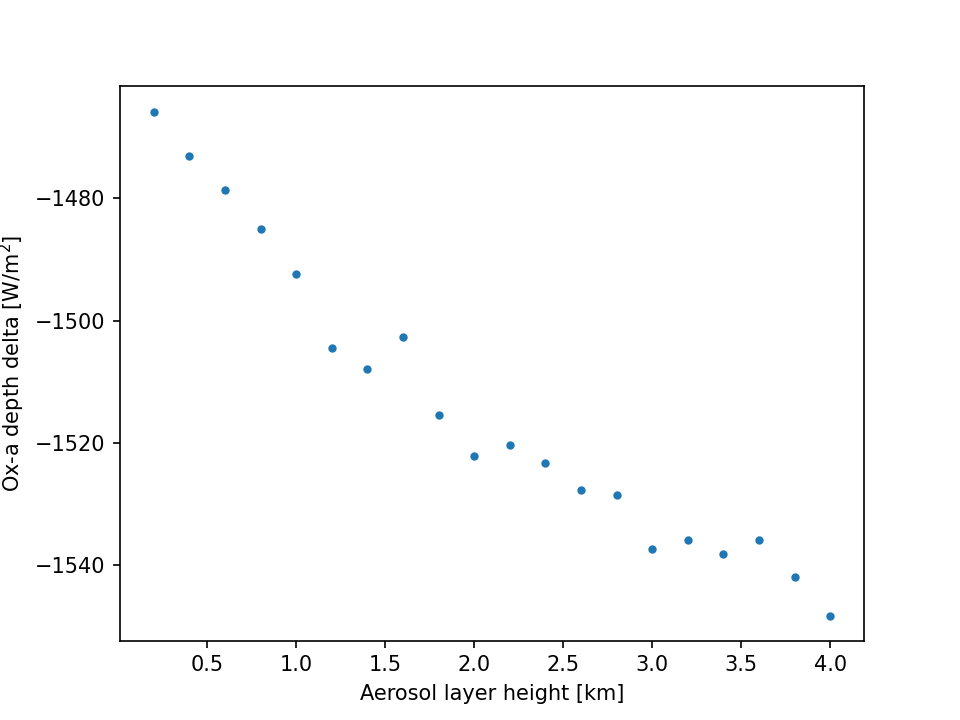

Text(0.5, 0, 'Aerosol layer height [km]')

In [442]:
plt.figure()
plt.plot(z_arrs[:,0],oxa_rad_delta[:,0,1],'.')
plt.ylabel('Ox-a depth delta [W/m$^2$]')
plt.xlabel('Aerosol layer height [km]') 

<IPython.core.display.Javascript object>


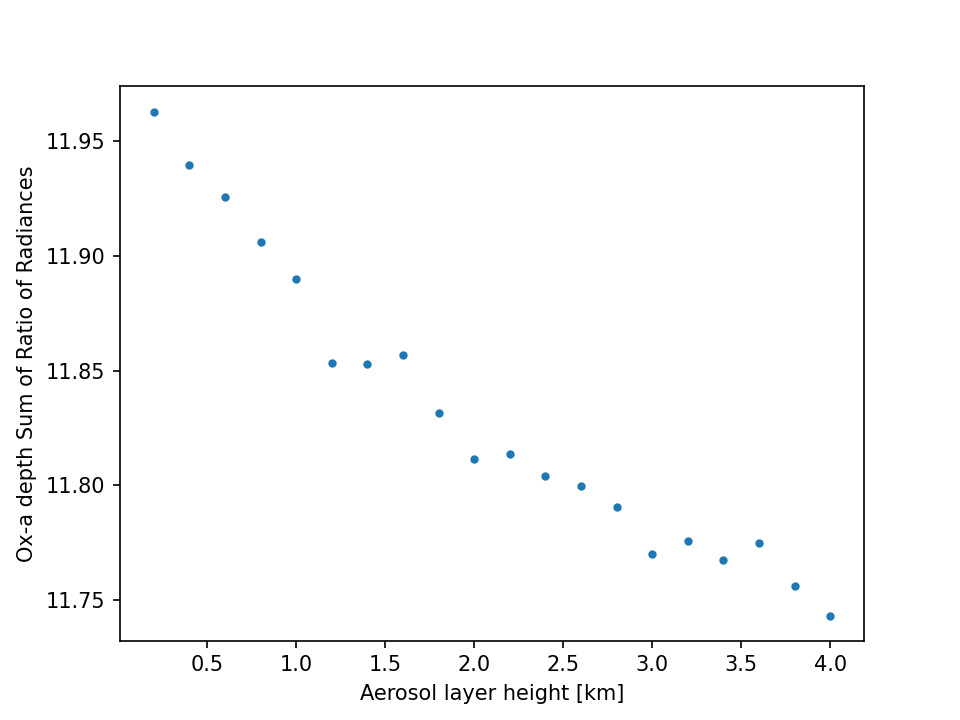

Text(0.5, 0, 'Aerosol layer height [km]')

In [443]:
plt.figure()
plt.plot(z_arrs[:,0],oxa_rad_ratio[:,0,1],'.')
plt.ylabel('Ox-a depth Sum of Ratio of Radiances')
plt.xlabel('Aerosol layer height [km]') 

<IPython.core.display.Javascript object>


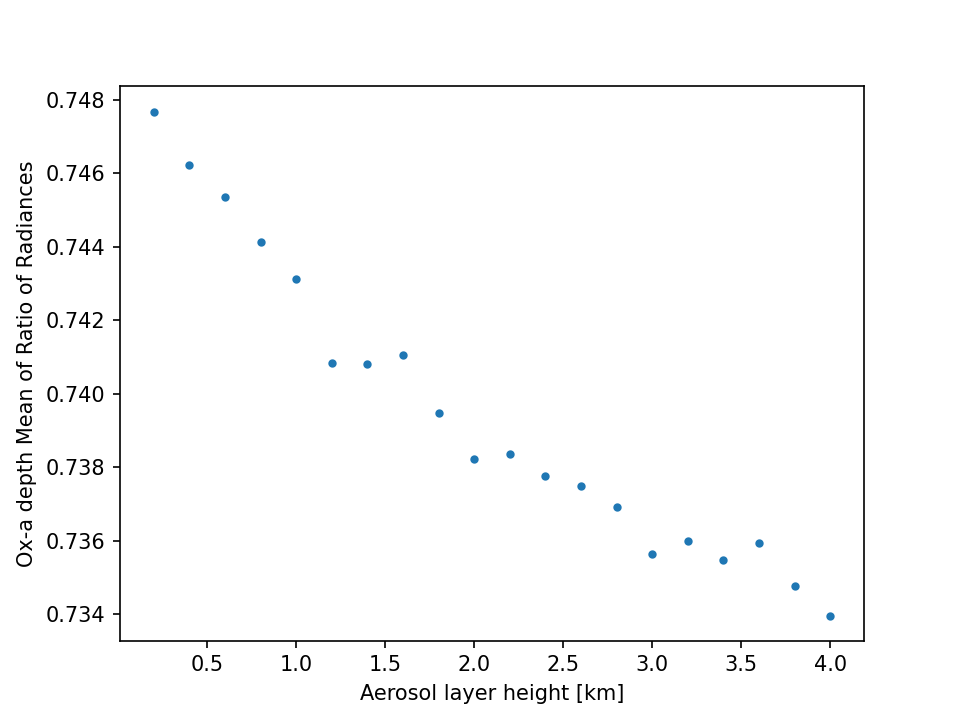

Text(0.5, 0, 'Aerosol layer height [km]')

In [444]:
plt.figure()
plt.plot(z_arrs[:,0],oxa_rad_ratio2[:,0,1],'.')
plt.ylabel('Ox-a depth Mean of Ratio of Radiances')
plt.xlabel('Aerosol layer height [km]') 

<IPython.core.display.Javascript object>


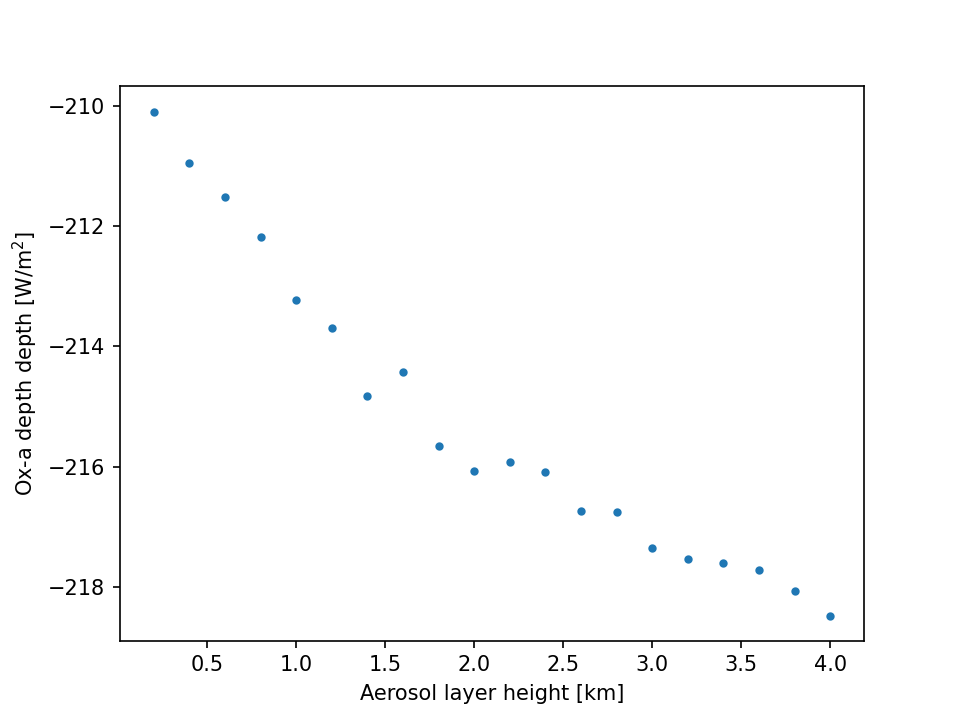

Text(0.5, 0, 'Aerosol layer height [km]')

In [445]:
plt.figure()
plt.plot(z_arrs[:,0],oxa_rad_depthm[:,0,1],'.')
plt.ylabel('Ox-a depth depth [W/m$^2$]')
plt.xlabel('Aerosol layer height [km]') 

In [446]:
import plotting_utils as pu

<IPython.core.display.Javascript object>


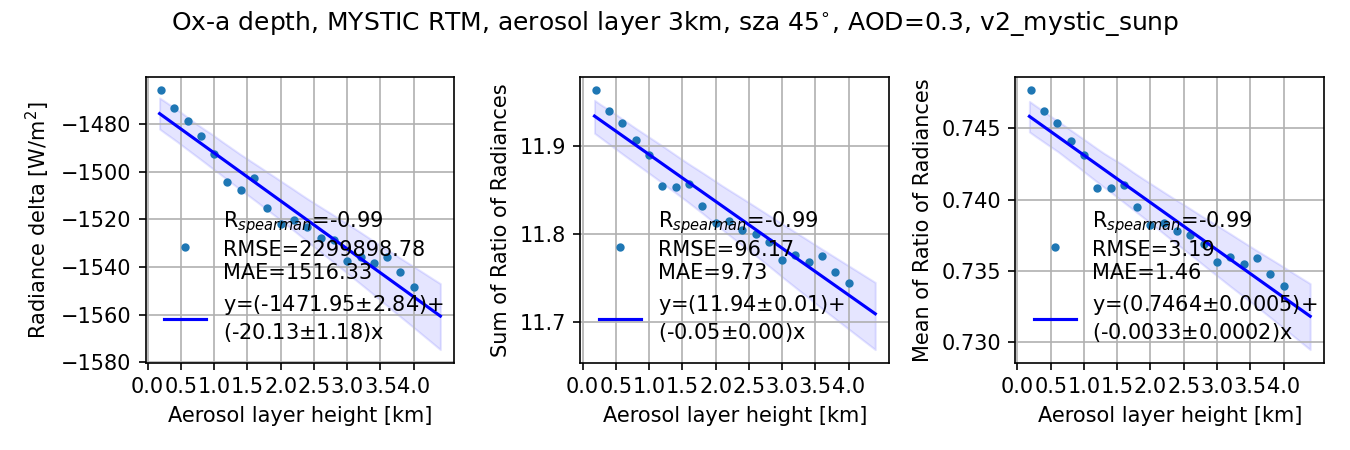

In [448]:
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].plot(z_arrs[:,0],oxa_rad_delta[:,0,1],'.',label='{}'.format(pu.stats_label(z_arrs[:,0],oxa_rad_delta[:,0,1])))
pu.plot_lin(z_arrs[:,0],oxa_rad_delta[:,0,1],ax=ax[0])
ax[0].set_ylabel('Radiance delta [W/m$^2$]')
ax[0].set_xlabel('Aerosol layer height [km]') 
ax[0].set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[0].grid()
ax[0].legend(loc=0,frameon=False)

ax[1].plot(z_arrs[:,0],oxa_rad_ratio[:,0,1],'.',label='{}'.format(pu.stats_label(z_arrs[:,0],oxa_rad_ratio[:,0,1])))
pu.plot_lin(z_arrs[:,0],oxa_rad_ratio[:,0,1],ax=ax[1])
ax[1].set_ylabel('Sum of Ratio of Radiances')
ax[1].set_xlabel('Aerosol layer height [km]')
ax[1].set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[1].grid()
ax[1].legend(loc=0,frameon=False)

ax[2].plot(z_arrs[:,0],oxa_rad_ratio2[:,0,1],'.',label='{}'.format(pu.stats_label(z_arrs[:,0],oxa_rad_ratio2[:,0,1],fmt='2.2f')))
pu.plot_lin(z_arrs[:,0],oxa_rad_ratio2[:,0,1],ax=ax[2],lblfmt='2.4f')
ax[2].set_ylabel('Mean of Ratio of Radiances')
ax[2].set_xlabel('Aerosol layer height [km]') 
ax[2].set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[2].grid()
ax[2].legend(loc=0,frameon=False)
plt.suptitle('Ox-a depth, MYSTIC RTM, aerosol layer 3km, sza 45$^{{\circ}}$, AOD={:1.1f}, {}'.format(aodv,vv))

plt.tight_layout()
plt.savefig(fp+'OXA_depth_RAD_layerheight_{}.png'.format(vv),dpi=300,transparent=True)

### Oxa depth for Optical depth

In [449]:
air_mass = 1.0/np.cos(sza*np.pi/180.0)

In [450]:
air_mass

1.9035944074044246

In [451]:
tau_02 = np.log(rad[:,:,0,:]/rad[:,:,2,:])*air_mass*-1.0
tau_10 = np.log(rad[:,:,1,:]/rad[:,:,2,:])*air_mass*-1.0

<ipython-input-451-aaa3f63e90a3>:1: RuntimeWarning: divide by zero encountered in true_divide
  tau_02 = np.log(rad[:,:,0,:]/rad[:,:,2,:])*air_mass*-1.0
<ipython-input-451-aaa3f63e90a3>:2: RuntimeWarning: divide by zero encountered in true_divide
  tau_10 = np.log(rad[:,:,1,:]/rad[:,:,2,:])*air_mass*-1.0


In [452]:
i = 1

<IPython.core.display.Javascript object>


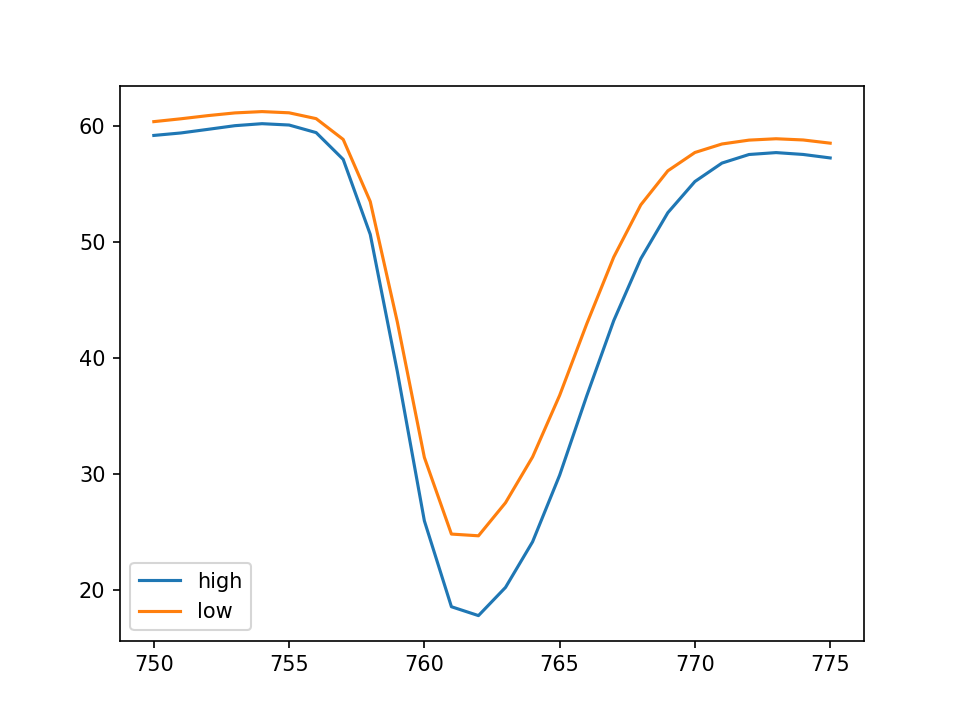

In [453]:
iu = 5
plt.figure()
plt.plot(wvl,rad[i,:,2,iu],label='high')
plt.plot(wvl,rad[i,:,0,iu],label='low')
plt.legend()

In [288]:
tau_02.shape

(20, 26, 6)

In [454]:
oxa_tau_delta = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_tau_ratio = np.zeros((n,len(zout),len(umu)-1))+np.nan
oxa_tau_ratio2 = np.zeros((n,len(zout),len(umu)-1))+np.nan
for i in range(n):
    for iz,z in enumerate(zout):
        oxa_tau_delta[i,iz,:], oxa_tau_ratio[i,iz,:], oxa_tau_ratio2[i,iz,:],_,_ = oxa_depth_v3(wvl/1000.0,tau_02[i,:,:].T)

<ipython-input-437-35529416d03b>:7: RuntimeWarning: invalid value encountered in double_scalars
  oxa_flat = [(s[y1]-s[y0])/(w[y1]-w[y0])*(w[y0:y1]-w[y0])+s[y0] for s in spec]
<ipython-input-437-35529416d03b>:10: RuntimeWarning: Mean of empty slice
  oxa_ratio2 = np.array([np.nanmean(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-437-35529416d03b>:7: RuntimeWarning: invalid value encountered in multiply
  oxa_flat = [(s[y1]-s[y0])/(w[y1]-w[y0])*(w[y0:y1]-w[y0])+s[y0] for s in spec]
<ipython-input-437-35529416d03b>:7: RuntimeWarning: invalid value encountered in add
  oxa_flat = [(s[y1]-s[y0])/(w[y1]-w[y0])*(w[y0:y1]-w[y0])+s[y0] for s in spec]


<IPython.core.display.Javascript object>


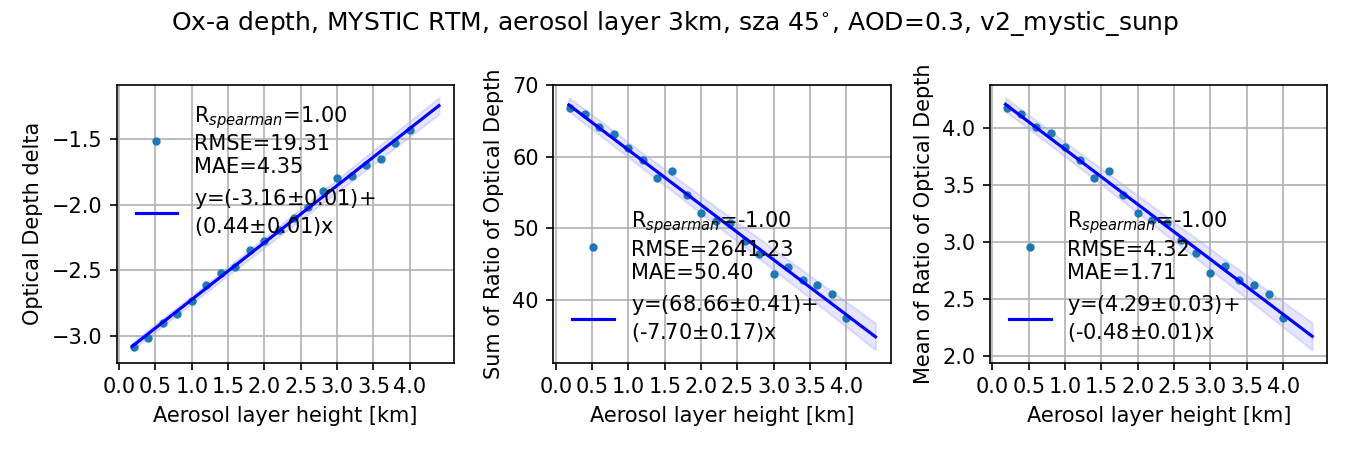

In [455]:
fig,ax = plt.subplots(1,3,figsize=(9,3))
#ax[0].plot(z_arrs[:,0],oxa_tau_delta[:,0,2],'.')
ax[0].plot(z_arrs[:,0],oxa_tau_delta[:,0,2],'.',label='{}'.format(pu.stats_label(z_arrs[:,0],oxa_tau_delta[:,0,2])))
pu.plot_lin(z_arrs[:,0],oxa_tau_delta[:,0,2],ax=ax[0])
ax[0].set_ylabel('Optical Depth delta')
ax[0].set_xlabel('Aerosol layer height [km]') 
ax[0].set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[0].grid()

ax[1].plot(z_arrs[:,0],oxa_tau_ratio[:,0,2],'.',label='{}'.format(pu.stats_label(z_arrs[:,0],oxa_tau_ratio[:,0,2])))
pu.plot_lin(z_arrs[:,0],oxa_tau_ratio[:,0,2],ax=ax[1])
ax[1].set_ylabel('Sum of Ratio of Optical Depth')
ax[1].set_xlabel('Aerosol layer height [km]')
ax[1].set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[1].grid()

ax[2].plot(z_arrs[:,0],oxa_tau_ratio2[:,0,2],'.',label='{}'.format(pu.stats_label(z_arrs[:,0],oxa_tau_ratio2[:,0,2])))
pu.plot_lin(z_arrs[:,0],oxa_tau_ratio2[:,0,2],ax=ax[2])
ax[2].set_ylabel('Mean of Ratio of Optical Depth')
ax[2].set_xlabel('Aerosol layer height [km]') 
ax[2].set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[2].grid()
plt.suptitle('Ox-a depth, MYSTIC RTM, aerosol layer 3km, sza 45$^{{\circ}}$, AOD={:1.1f}, {}'.format(aodv,vv))

ax[0].legend(loc=0,frameon=False)
ax[1].legend(loc=0,frameon=False)
ax[2].legend(loc=0,frameon=False)

plt.tight_layout()
plt.savefig(fp+'OXA_depth_TAU_layerheight_{}.png'.format(vv),dpi=300,transparent=True)

<IPython.core.display.Javascript object>


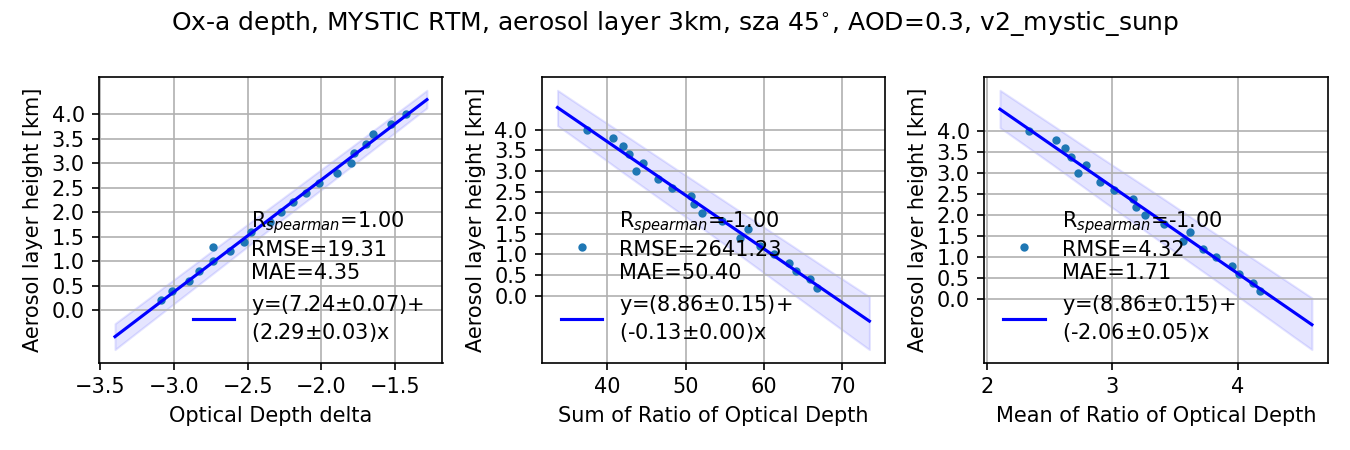

In [456]:
fig,ax = plt.subplots(1,3,figsize=(9,3))
#ax[0].plot(oxa_tau_delta[:,0,2],z_arrs[:,0],'.')
ax[0].plot(oxa_tau_delta[:,0,2],z_arrs[:,0],'.',label='{}'.format(pu.stats_label(oxa_tau_delta[:,0,2],z_arrs[:,0])))
pu.plot_lin(oxa_tau_delta[:,0,2],z_arrs[:,0],ax=ax[0])
ax[0].set_xlabel('Optical Depth delta')
ax[0].set_ylabel('Aerosol layer height [km]') 
ax[0].set_yticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[0].grid()

ax[1].plot(oxa_tau_ratio[:,0,2],z_arrs[:,0],'.',label='{}'.format(pu.stats_label(oxa_tau_ratio[:,0,2],z_arrs[:,0])))
pu.plot_lin(oxa_tau_ratio[:,0,2],z_arrs[:,0],ax=ax[1])
ax[1].set_xlabel('Sum of Ratio of Optical Depth')
ax[1].set_ylabel('Aerosol layer height [km]')
ax[1].set_yticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[1].grid()

ax[2].plot(oxa_tau_ratio2[:,0,2],z_arrs[:,0],'.',label='{}'.format(pu.stats_label(oxa_tau_ratio2[:,0,2],z_arrs[:,0])))
pu.plot_lin(oxa_tau_ratio2[:,0,2],z_arrs[:,0],ax=ax[2])
ax[2].set_xlabel('Mean of Ratio of Optical Depth')
ax[2].set_ylabel('Aerosol layer height [km]') 
ax[2].set_yticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[2].grid()
plt.suptitle('Ox-a depth, MYSTIC RTM, aerosol layer 3km, sza 45$^{{\circ}}$, AOD={:1.1f}, {}'.format(aodv,vv))

ax[0].legend(loc=0,frameon=False)
ax[1].legend(loc=0,frameon=False)
ax[2].legend(loc=0,frameon=False)

plt.tight_layout()
plt.savefig(fp+'OXA_depth_layerheight_TAU_{}.png'.format(vv),dpi=300,transparent=True)

## Based on multiple sza, v2

### Radiance

In [725]:
rad.shape

(20, 26, 3, 7, 8)

In [728]:
sza_arr.shape, umus.shape, len(zout), len(wvl), len(z_arrs)

((8,), (7,), 3, 26, 20)

In [731]:
umu_arr.shape

(8, 7)

In [733]:
len(umu)

8

In [739]:
oxa_rad_delta[i,iz,u,:].shape

(8,)

In [742]:
oxa_rad_delta = np.zeros((n,len(zout),len(umus),len(sza_arr)))+np.nan
oxa_rad_ratio = np.zeros((n,len(zout),len(umus),len(sza_arr)))+np.nan
oxa_rad_ratio2 = np.zeros((n,len(zout),len(umus),len(sza_arr)))+np.nan
oxa_rad_depthr = np.zeros((n,len(zout),len(umus),len(sza_arr)))+np.nan
oxa_rad_depthm = np.zeros((n,len(zout),len(umus),len(sza_arr)))+np.nan
for i in range(n):
    for iz,z in enumerate(zout):
        for u in range(len(umus
                          )):
            oxa_rad_delta[i,iz,u,:], oxa_rad_ratio[i,iz,u,:], oxa_rad_ratio2[i,iz,u,:], \
            oxa_rad_depthr[i,iz,u,:], oxa_rad_depthm[i,iz,u,:] = oxa_depth_v3(wvl/1000.0,rad[i,:,iz,u,:].T)

<ipython-input-719-35529416d03b>:9: RuntimeWarning: invalid value encountered in true_divide
  oxa_ratio = np.array([np.nansum(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-719-35529416d03b>:10: RuntimeWarning: invalid value encountered in true_divide
  oxa_ratio2 = np.array([np.nanmean(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-719-35529416d03b>:10: RuntimeWarning: Mean of empty slice
  oxa_ratio2 = np.array([np.nanmean(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-719-35529416d03b>:11: RuntimeWarning: invalid value encountered in double_scalars
  oxa_depthr = np.array([s[ym]/oxa_flat[i][ym-y0] for i,s in enumerate(spec)])
<ipython-input-719-35529416d03b>:9: RuntimeWarning: divide by zero encountered in true_divide
  oxa_ratio = np.array([np.nansum(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-719-35529416d03b>:10: RuntimeWarning: divide by zero encountered in true_divide
  oxa_ratio2 = np.array([np.nan

<IPython.core.display.Javascript object>


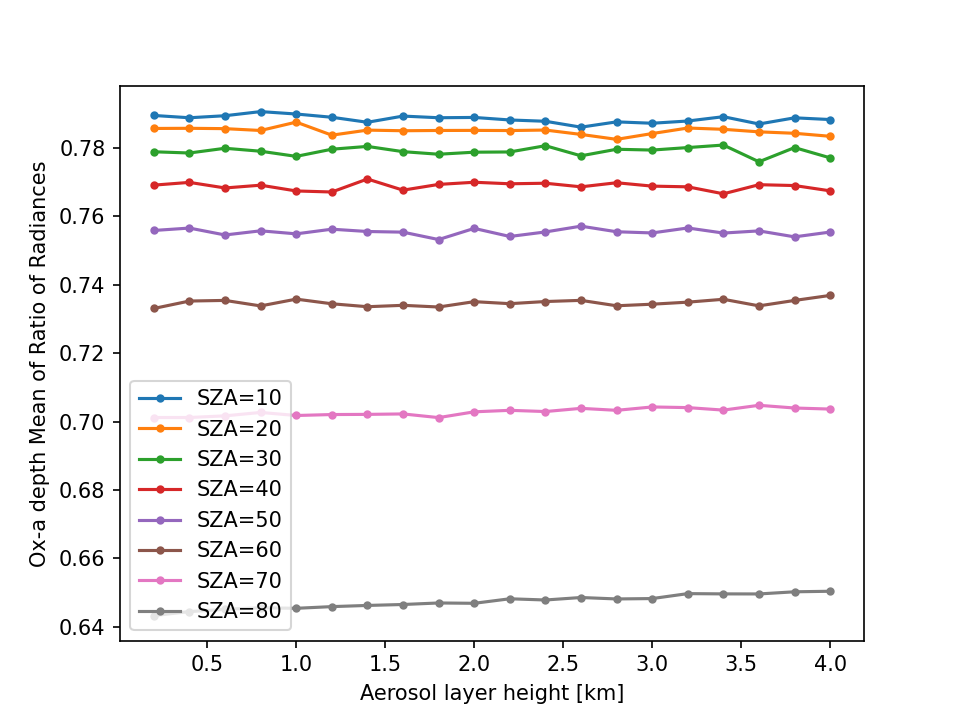

Text(0.5, 0, 'Aerosol layer height [km]')

In [743]:
plt.figure()
plt.plot(z_arrs[:,0],oxa_rad_ratio2[:,0,1,:],'.-',label=['SZA='+str(z) for z in sza_arr])
plt.legend()
plt.ylabel('Ox-a depth Mean of Ratio of Radiances')
plt.xlabel('Aerosol layer height [km]') 

### Optical Depth

In [584]:
air_mass = 1.0/np.cos(sza_arr*np.pi/180.0)

In [585]:
air_mass

array([1.01542661, 1.06417777, 1.15470054, 1.30540729, 1.55572383,
       2.        , 2.9238044 , 5.75877048])

In [586]:
tau_02 = np.log(rad[:,:,0,:,:]/rad[:,:,2,:,:])*air_mass*-1.0
tau_10 = np.log(rad[:,:,1,:,:]/rad[:,:,2,:,:])*air_mass*-1.0

<ipython-input-586-cc544051c32a>:1: RuntimeWarning: divide by zero encountered in true_divide
  tau_02 = np.log(rad[:,:,0,:,:]/rad[:,:,2,:,:])*air_mass*-1.0
<ipython-input-586-cc544051c32a>:2: RuntimeWarning: divide by zero encountered in true_divide
  tau_10 = np.log(rad[:,:,1,:,:]/rad[:,:,2,:,:])*air_mass*-1.0


In [587]:
oxa_tau_delta = np.zeros((n,len(zout),len(umu)-1,len(sza_arr)))+np.nan
oxa_tau_ratio = np.zeros((n,len(zout),len(umu)-1,len(sza_arr)))+np.nan
oxa_tau_ratio2 = np.zeros((n,len(zout),len(umu)-1,len(sza_arr)))+np.nan
for i in range(n):
    for iz,z in enumerate(zout):
        for u in range(len(umu)-1):
            oxa_tau_delta[i,iz,u,:], oxa_tau_ratio[i,iz,u,:], oxa_tau_ratio2[i,iz,u,:],_,_\
             = oxa_depth_v3(wvl/1000.0,tau_02[i,:,u,:].T)

<ipython-input-561-35529416d03b>:7: RuntimeWarning: invalid value encountered in double_scalars
  oxa_flat = [(s[y1]-s[y0])/(w[y1]-w[y0])*(w[y0:y1]-w[y0])+s[y0] for s in spec]
<ipython-input-561-35529416d03b>:10: RuntimeWarning: Mean of empty slice
  oxa_ratio2 = np.array([np.nanmean(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-561-35529416d03b>:7: RuntimeWarning: invalid value encountered in multiply
  oxa_flat = [(s[y1]-s[y0])/(w[y1]-w[y0])*(w[y0:y1]-w[y0])+s[y0] for s in spec]
<ipython-input-561-35529416d03b>:8: RuntimeWarning: invalid value encountered in subtract
  oxa_delta = np.array([np.nansum(s[y0:y1]-oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-561-35529416d03b>:9: RuntimeWarning: invalid value encountered in true_divide
  oxa_ratio = np.array([np.nansum(s[y0:y1]/oxa_flat[i]) for i,s in enumerate(spec)])
<ipython-input-561-35529416d03b>:10: RuntimeWarning: invalid value encountered in true_divide
  oxa_ratio2 = np.array([np.nanmean(s[y0:y1]/ox

<IPython.core.display.Javascript object>


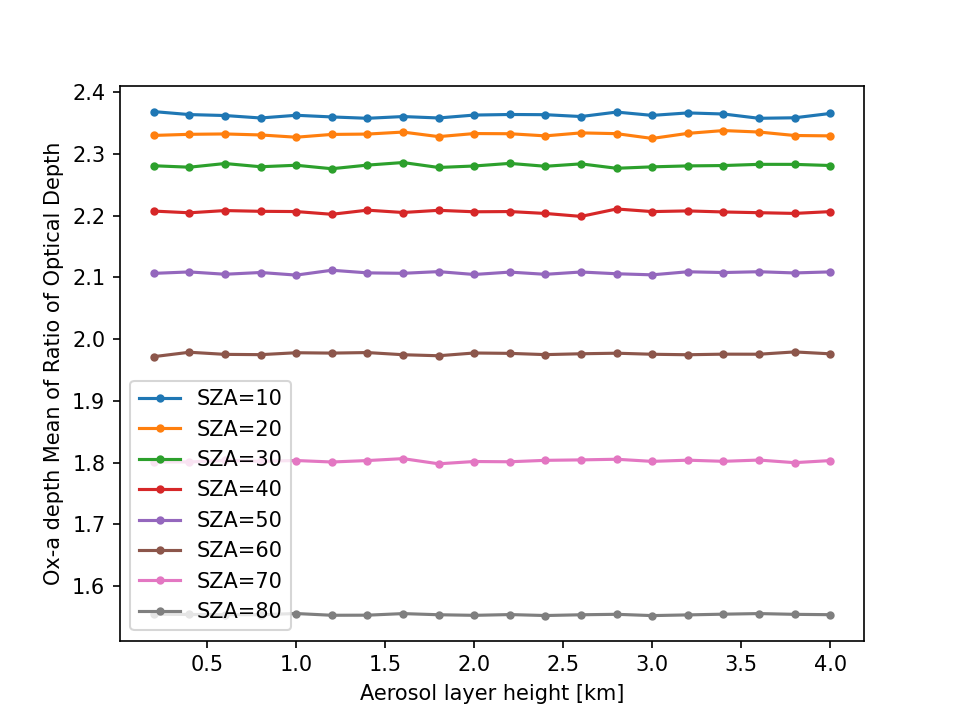

Text(0.5, 0, 'Aerosol layer height [km]')

In [603]:
plt.figure()
plt.plot(z_arrs[:,0],oxa_tau_ratio2[:,0,0,:],'.-',label=['SZA='+str(z) for z in sza_arr])
plt.legend()
plt.ylabel('Ox-a depth Mean of Ratio of Optical Depth')
plt.xlabel('Aerosol layer height [km]') 

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(9,3))
#ax[0].plot(z_arrs[:,0],oxa_tau_delta[:,0,2],'.')
ax[0].plot(z_arrs[:,0],oxa_tau_delta[:,0,2],'.',label='{}'.format(pu.stats_label(z_arrs[:,0],oxa_tau_delta[:,0,2])))
pu.plot_lin(z_arrs[:,0],oxa_tau_delta[:,0,2],ax=ax[0])
ax[0].set_ylabel('Optical Depth delta')
ax[0].set_xlabel('Aerosol layer height [km]') 
ax[0].set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[0].grid()

ax[1].plot(z_arrs[:,0],oxa_tau_ratio[:,0,2],'.',label='{}'.format(pu.stats_label(z_arrs[:,0],oxa_tau_ratio[:,0,2])))
pu.plot_lin(z_arrs[:,0],oxa_tau_ratio[:,0,2],ax=ax[1])
ax[1].set_ylabel('Sum of Ratio of Optical Depth')
ax[1].set_xlabel('Aerosol layer height [km]')
ax[1].set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[1].grid()

ax[2].plot(z_arrs[:,0],oxa_tau_ratio2[:,0,2],'.',label='{}'.format(pu.stats_label(z_arrs[:,0],oxa_tau_ratio2[:,0,2])))
pu.plot_lin(z_arrs[:,0],oxa_tau_ratio2[:,0,2],ax=ax[2])
ax[2].set_ylabel('Mean of Ratio of Optical Depth')
ax[2].set_xlabel('Aerosol layer height [km]') 
ax[2].set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[2].grid()
plt.suptitle('Ox-a depth, MYSTIC RTM, aerosol layer 3km, sza 45$^{{\circ}}$, AOD={:1.1f}, {}'.format(aodv,vv))

ax[0].legend(loc=0,frameon=False)
ax[1].legend(loc=0,frameon=False)
ax[2].legend(loc=0,frameon=False)

plt.tight_layout()
#plt.savefig(fp+'OXA_depth_TAU_layerheight_{}.png'.format(vv),dpi=300,transparent=True)

# UNL-VRTM tester

In [767]:
import pyunlvrtm as pum

## Build up some calcs

In [ ]:
pum.nmlist_replace()

In [983]:
pum.nmlist_replace(fum+'namelist.ini',['Solar zenith angle      : 60'],fum+'namelist_sza60.ini',['Solar zenith angle      : 30'])

In [985]:
pum.__file__

'/home/sam/.local/lib/python3.8/site-packages/pyunlvrtm/__init__.py'

## Read the outputs

In [963]:
fum = '/home/sam/unl-vrtm/unl-vrtm-2.1/run/'
var = ['Stokes','Flux_Direct','SZA','VZA','ZS','RAZ','ProfRange','Z','LayP','Asymm','Xsec_Combined',
       'tauAER','omegaAER','tauIOP','Geo_Offset','Gas']
te1 = pum.read_unlvrtm(fum+'OxA_height_1km.unlvrtm.nc',var=var)
te2 = pum.read_unlvrtm(fum+'OxA_height_2km.unlvrtm.nc',var=var)
te3 = pum.read_unlvrtm(fum+'OxA_height_3km.unlvrtm.nc',var=var)
te4 = pum.read_unlvrtm(fum+'OxA_height_4km.unlvrtm.nc',var=var)
te5 = pum.read_unlvrtm(fum+'OxA_height_5km.unlvrtm.nc',var=var)
te6 = pum.read_unlvrtm(fum+'OxA_height_6km.unlvrtm.nc',var=var)
te7 = pum.read_unlvrtm(fum+'OxA_height_7km.unlvrtm.nc',var=var)

In [964]:
te.keys()

dict_keys(['Source', 'Lamdas', 'Wavenum', 'SZA', 'Stokes', 'Flux_Direct', 'VZA', 'ZS', 'RAZ', 'ProfRange', 'Z', 'LayP', 'Asymm', 'Xsec_Combined', 'tauAER', 'omegaAER', 'tauIOP', 'Geo_Offset', 'Gas'])

In [965]:
te['VZA'], te['SZA'], te['RAZ']

(masked_array(data=[30. , 30.5, 31. , 31.5, 60. ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=30.,
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=359.9999,
              mask=False,
        fill_value=1e+20,
             dtype=float32))

In [966]:
te['Z'].shape

(34,)

In [967]:
te['Asymm'].shape

(2, 16)

In [968]:
for k in list(te.keys()):
    try:
        print(k,te[k].shape)
    except AttributeError:
        print(k,te[k])

Source /home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_height_test.unlvrtm.nc
Lamdas (16,)
Wavenum (16,)
SZA ()
Stokes (3, 5, 16)
Flux_Direct (3, 16)
VZA (5,)
ZS ()
RAZ ()
ProfRange (2, 2)
Z (34,)
LayP (33,)
Asymm (2, 16)
Xsec_Combined (22, 33, 16)
tauAER (2, 33, 16)
omegaAER (2, 33, 16)
tauIOP (33, 16)
Geo_Offset (5,)
Gas (22,)


In [969]:
te['Z']

masked_array(data=[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
                     9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
                    18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  30.,
                    35.,  40.,  50.,  60.,  80., 100., 120.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [970]:
te['Gas']

array(['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'O2', 'NO', 'SO2', 'NO2',
       'NH3', 'HNO3', 'OH', 'HF', 'HCL', 'HBR', 'HI', 'CLO', 'OCS',
       'H2CO', 'HOCL', 'N2'], dtype='<U4')

<IPython.core.display.Javascript object>


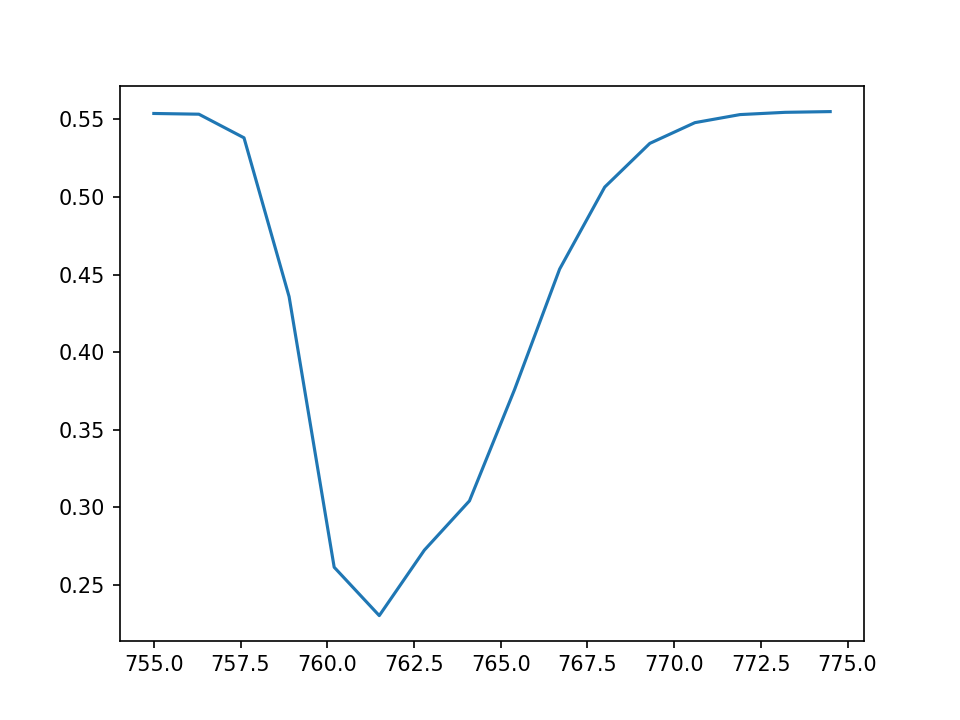

In [971]:
plt.figure()
plt.plot(te['Lamdas'],te['Flux_Direct'][0,:])

<IPython.core.display.Javascript object>


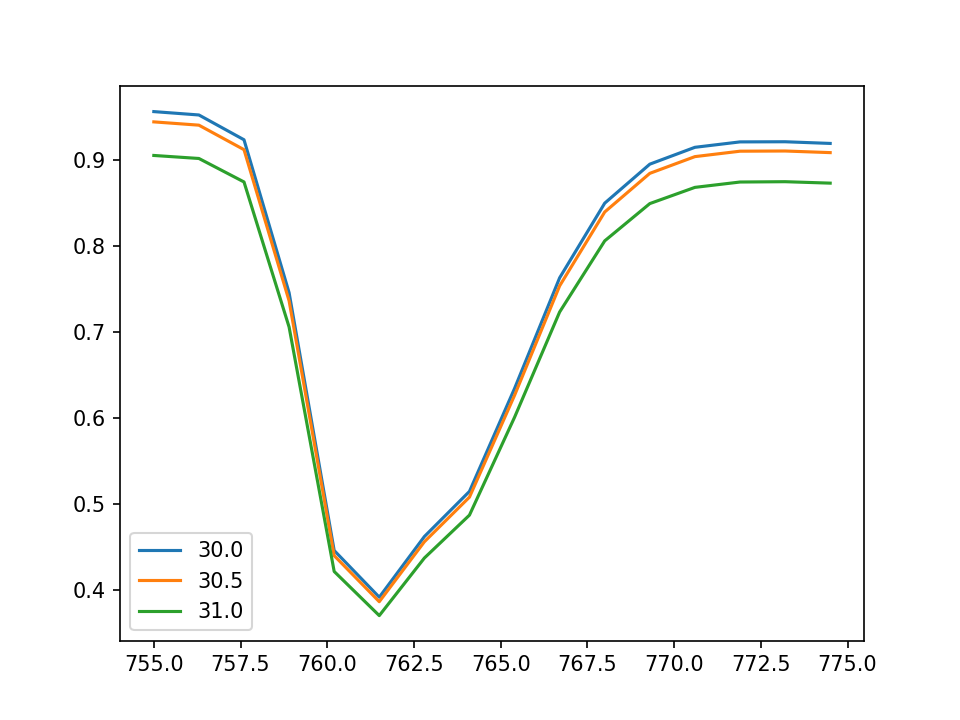

In [978]:
plt.figure()
plt.plot(te['Lamdas'],te2['Stokes'][0,:,:].T,label=[str(v) for v in te2['VZA']])
plt.legend()

In [973]:
te1['ProfRange'],te2['ProfRange'],te3['ProfRange'],te4['ProfRange'],te5['ProfRange'],te6['ProfRange'],te7['ProfRange']

(masked_array(
   data=[[1., 2.],
         [2., 7.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[2., 3.],
         [2., 7.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[3., 4.],
         [2., 7.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[4., 5.],
         [2., 7.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[5., 6.],
         [2., 7.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[6., 7.],
         [2., 7.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[7., 8.],
         [2., 7.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32))

<IPython.core.display.Javascript object>


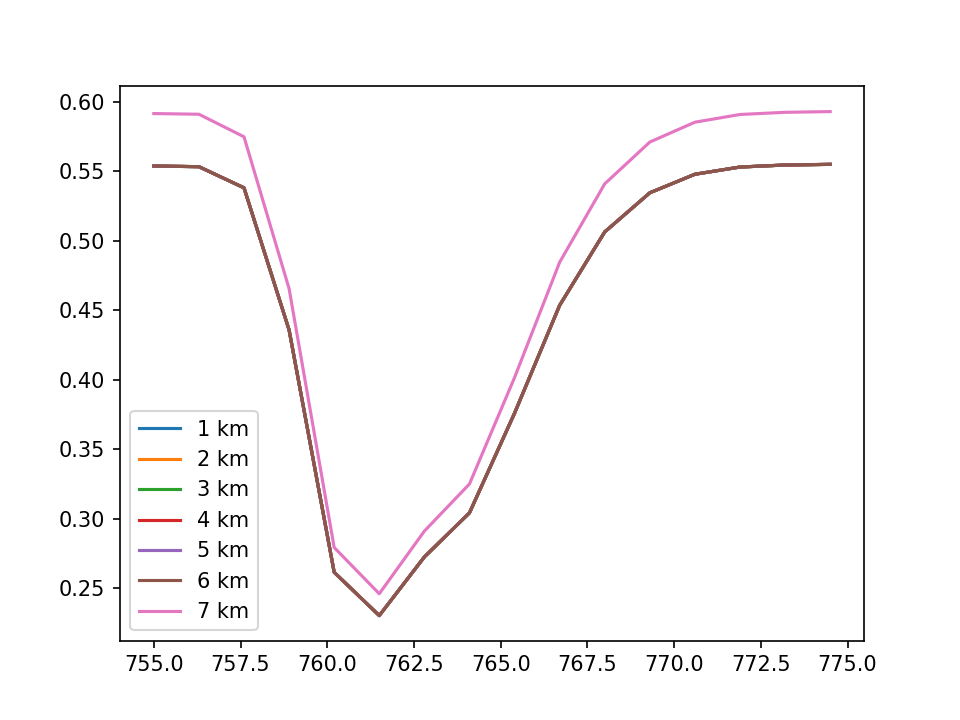

In [979]:
plt.figure()
plt.plot(te['Lamdas'],te1['Flux_Direct'][0,:],label='1 km')
plt.plot(te['Lamdas'],te2['Flux_Direct'][0,:],label='2 km')
plt.plot(te['Lamdas'],te3['Flux_Direct'][0,:],label='3 km')
plt.plot(te['Lamdas'],te4['Flux_Direct'][0,:],label='4 km')
plt.plot(te['Lamdas'],te5['Flux_Direct'][0,:],label='5 km')
plt.plot(te['Lamdas'],te6['Flux_Direct'][0,:],label='6 km')
plt.plot(te['Lamdas'],te7['Flux_Direct'][0,:],label='7 km')
plt.legend()


<IPython.core.display.Javascript object>


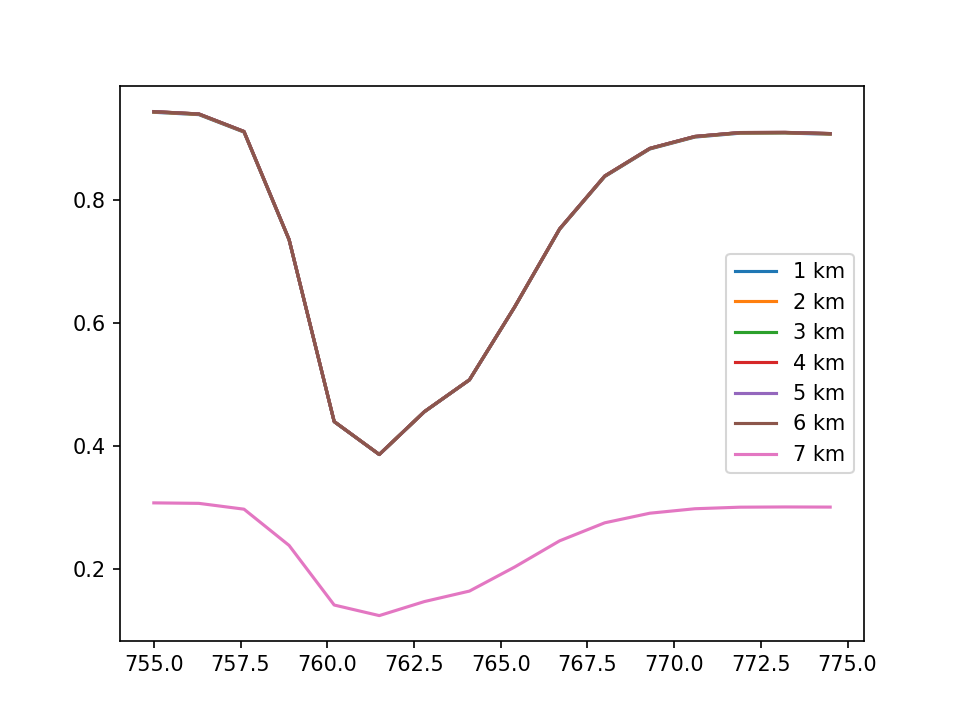

In [981]:
plt.figure()
plt.plot(te['Lamdas'],te1['Stokes'][0,1,:],label='1 km')
plt.plot(te['Lamdas'],te2['Stokes'][0,1,:],label='2 km')
plt.plot(te['Lamdas'],te3['Stokes'][0,1,:],label='3 km')
plt.plot(te['Lamdas'],te4['Stokes'][0,1,:],label='4 km')
plt.plot(te['Lamdas'],te5['Stokes'][0,1,:],label='5 km')
plt.plot(te['Lamdas'],te6['Stokes'][0,1,:],label='6 km')
plt.plot(te['Lamdas'],te7['Stokes'][0,1,:],label='7 km')
plt.legend()


<IPython.core.display.Javascript object>


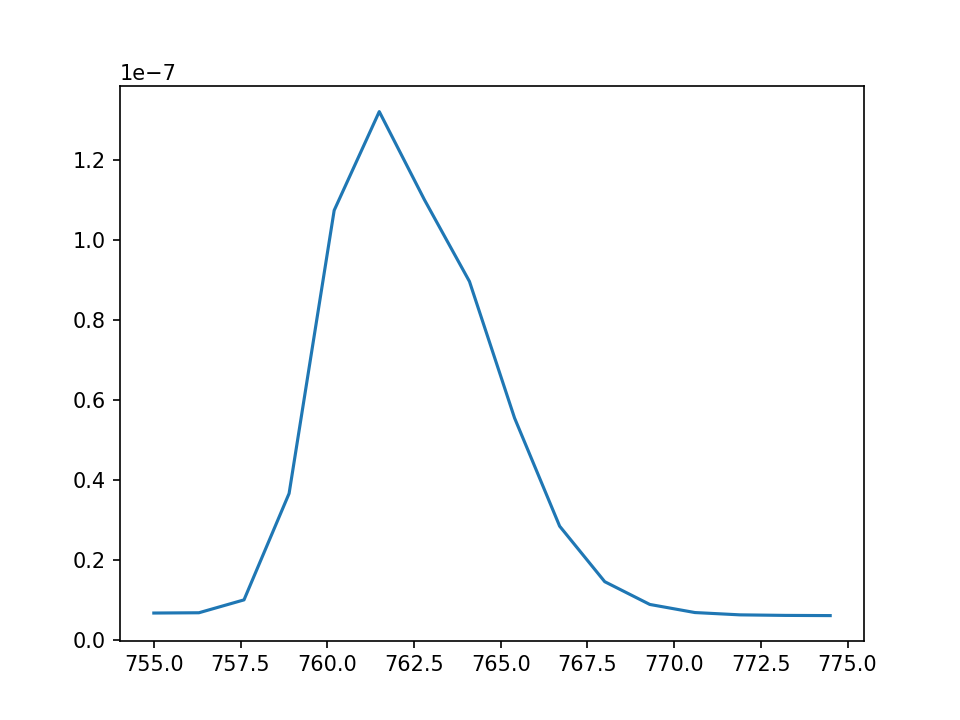

In [976]:
plt.figure()
plt.plot(te['Lamdas'],te1['tauIOP'][0,:])

## Read Principal Plane oxa runs

In [986]:
fum = '/home/sam/unl-vrtm/unl-vrtm-2.1/run/'
var = ['Stokes','Flux_Direct','SZA','VZA','ZS','RAZ','ProfRange','Z','LayP','Asymm','Xsec_Combined',
       'tauAER','omegaAER','tauIOP','Geo_Offset','Gas']
tp0 = pum.read_unlvrtm(fum+'OxA_height_0km_PP.unlvrtm.nc',var=var)
tp1 = pum.read_unlvrtm(fum+'OxA_height_1km_PP.unlvrtm.nc',var=var)
tp2 = pum.read_unlvrtm(fum+'OxA_height_2km_PP.unlvrtm.nc',var=var)
tp3 = pum.read_unlvrtm(fum+'OxA_height_3km_PP.unlvrtm.nc',var=var)
tp4 = pum.read_unlvrtm(fum+'OxA_height_4km_PP.unlvrtm.nc',var=var)
tp5 = pum.read_unlvrtm(fum+'OxA_height_5km_PP.unlvrtm.nc',var=var)
tp6 = pum.read_unlvrtm(fum+'OxA_height_6km_PP.unlvrtm.nc',var=var)
tp7 = pum.read_unlvrtm(fum+'OxA_height_7km_PP.unlvrtm.nc',var=var)
tp8 = pum.read_unlvrtm(fum+'OxA_height_8km_PP.unlvrtm.nc',var=var)

In [987]:
tp0['Stokes'].shape

(3, 9, 16)

In [1014]:
len(tp0['VZA'])

9

In [992]:
tp0['Lamdas'].shape

(16,)

In [997]:
tp0['ProfRange']

masked_array(
  data=[[0., 1.],
        [2., 7.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [1001]:
tp1['ProfRange'][0,1]

2.0

<IPython.core.display.Javascript object>


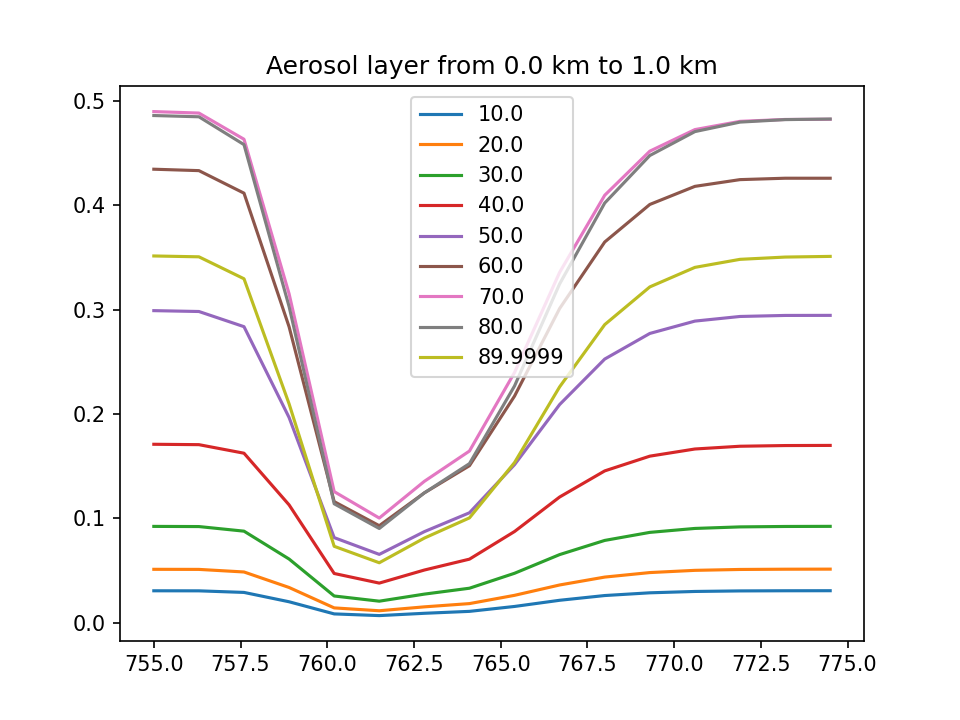

<IPython.core.display.Javascript object>


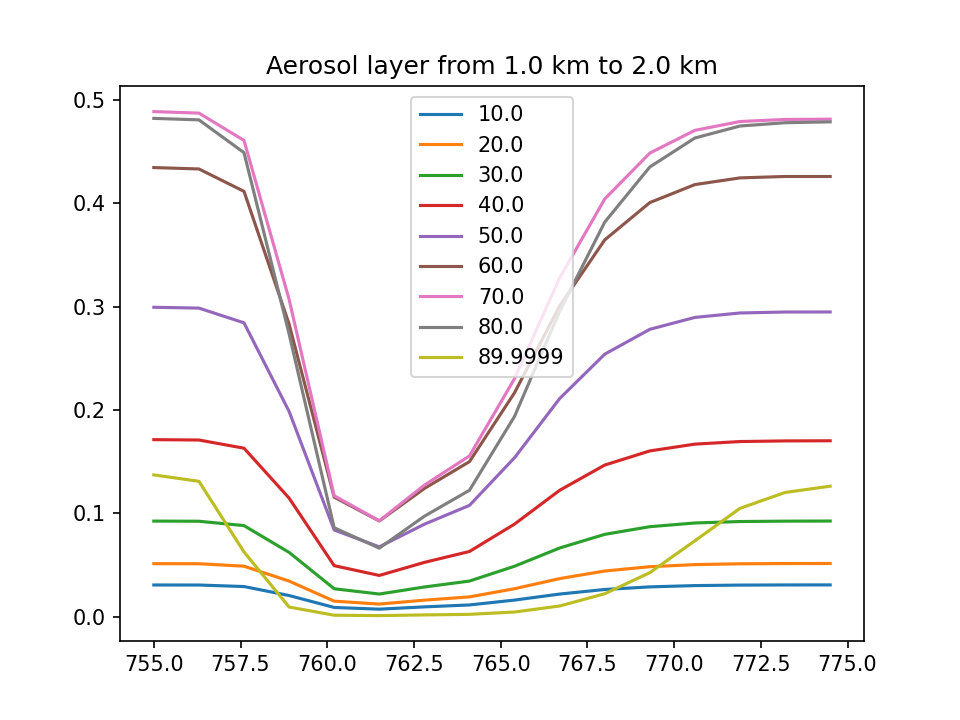

<IPython.core.display.Javascript object>


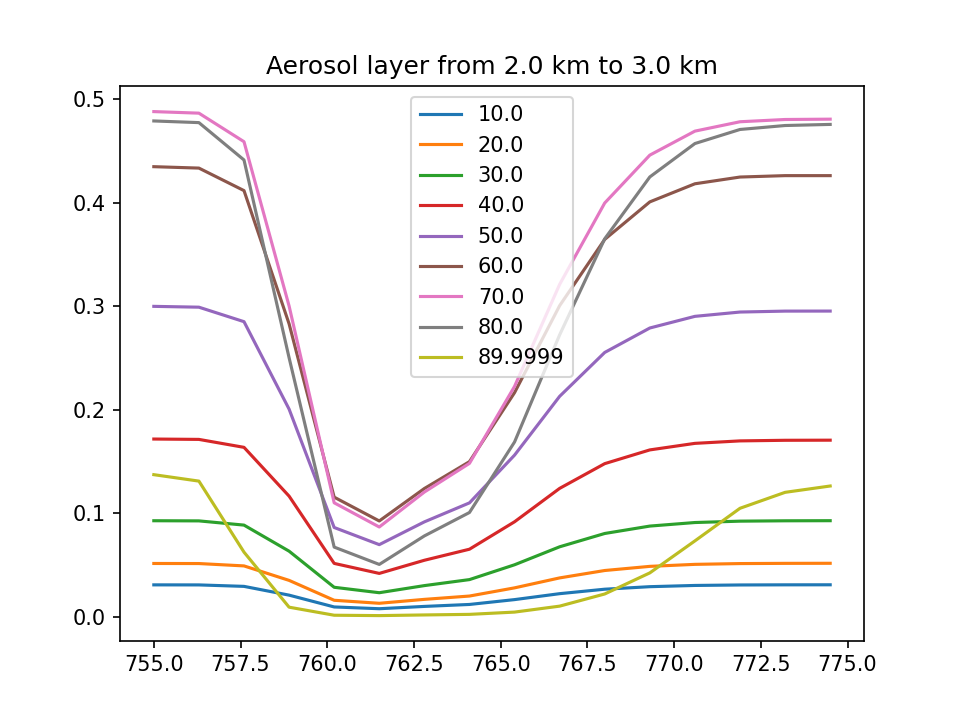

<IPython.core.display.Javascript object>


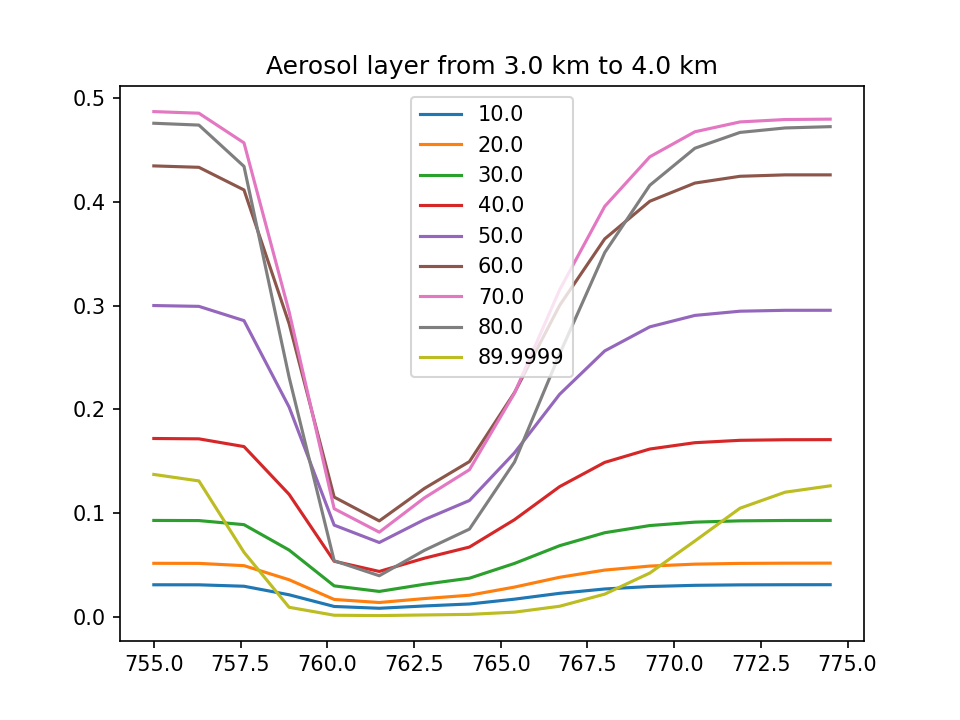

<IPython.core.display.Javascript object>


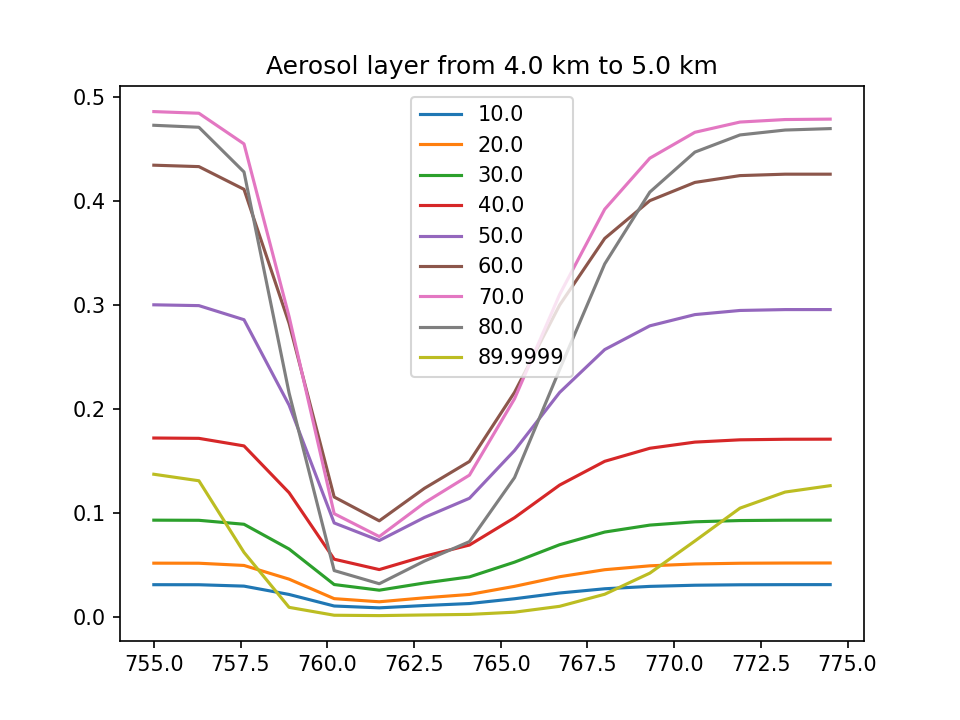

<IPython.core.display.Javascript object>


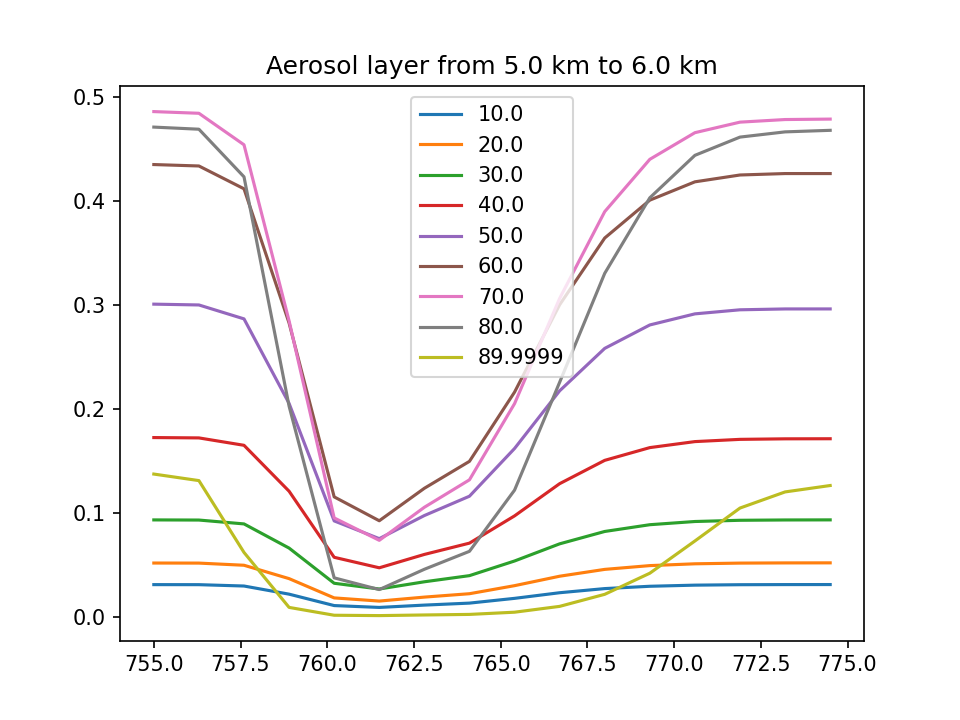

<IPython.core.display.Javascript object>


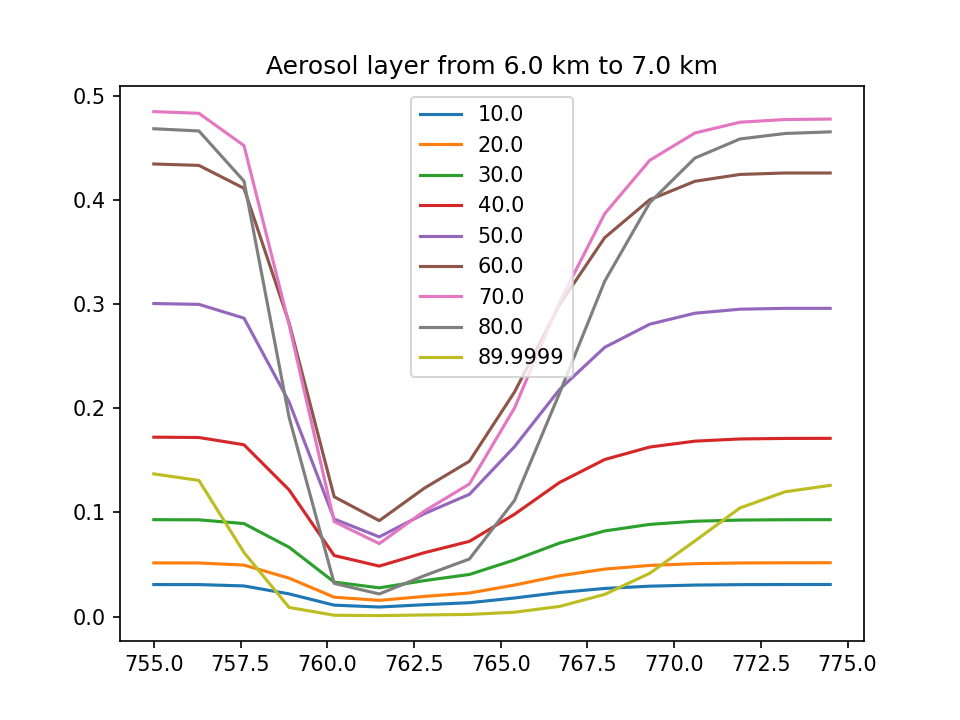

<IPython.core.display.Javascript object>


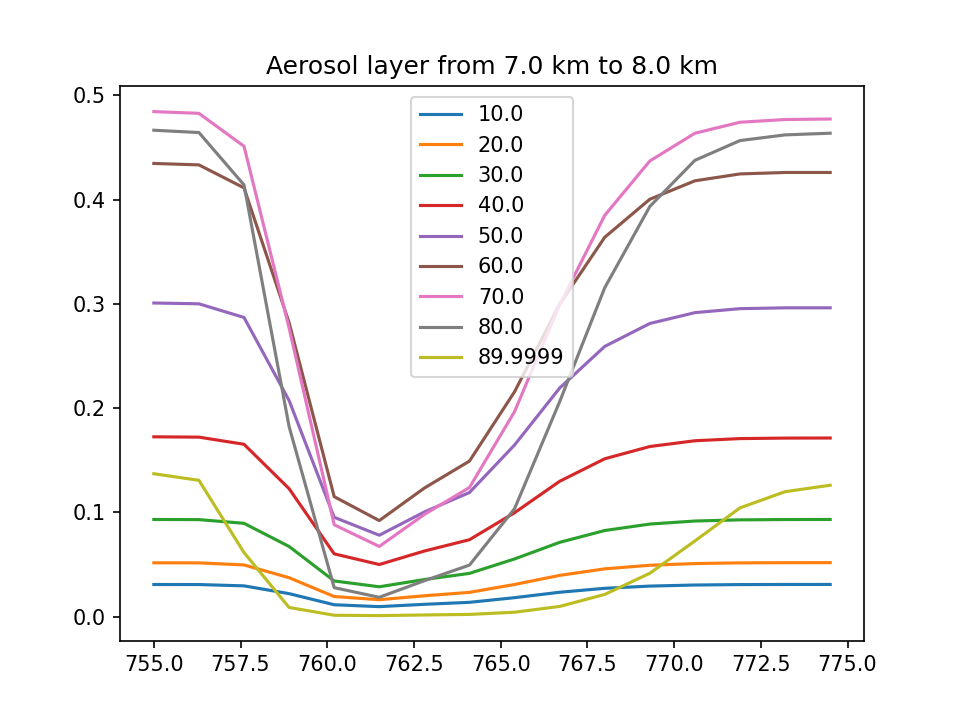

<IPython.core.display.Javascript object>


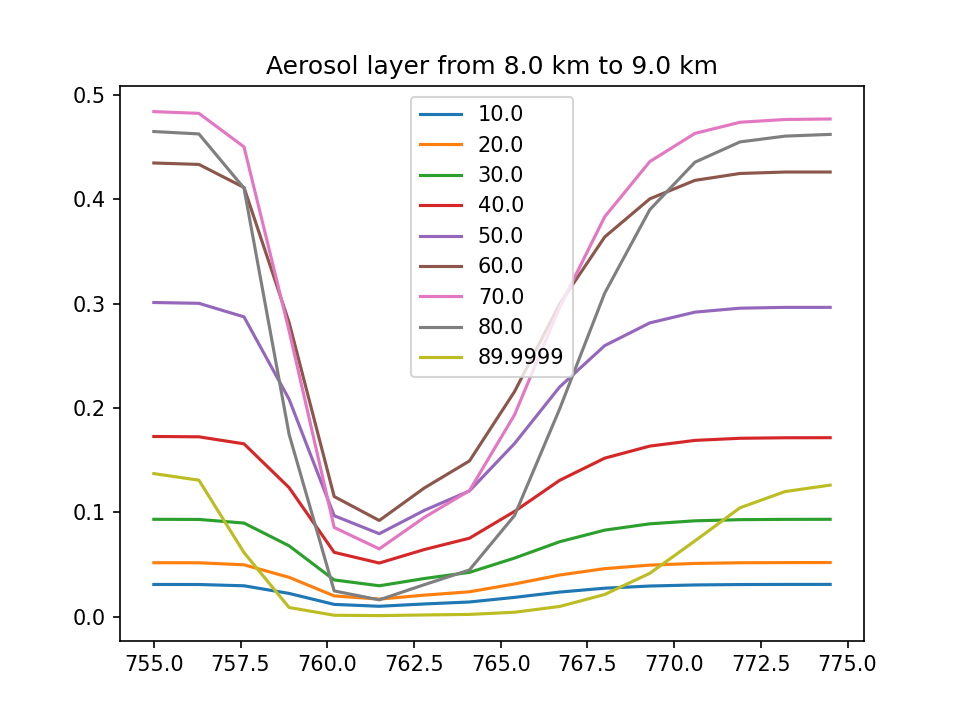

In [1002]:
for tp in [tp0,tp1,tp2,tp3,tp4,tp5,tp6,tp7,tp8]:
    plt.figure()
    plt.plot(tp['Lamdas'],tp['Stokes'][0,:,:].T,label=[str(v) for v in tp['VZA']])
    plt.legend()
    plt.title('Aerosol layer from {:2.1f} km to {:2.1f} km'.format(tp['ProfRange'][0,0],tp['ProfRange'][0,1]))

In [1024]:
oxa_pp = np.zeros((5,len(tp0['VZA']),9))+np.nan
z_arr = []
for i,tp in enumerate([tp0,tp1,tp2,tp3,tp4,tp5,tp6,tp7,tp8]):
    oxa_pp[:,:,i] = oxa_depth_v3(tp['Lamdas']/1000.0,tp['Stokes'][0,:,:])
    z_arr.append(tp['ProfRange'][0,0])

In [1019]:
oxa_pp.shape

(5, 9, 9)

In [1040]:
vza = ['{:2.1f}'.format(z) for z in tp['VZA']]

<IPython.core.display.Javascript object>


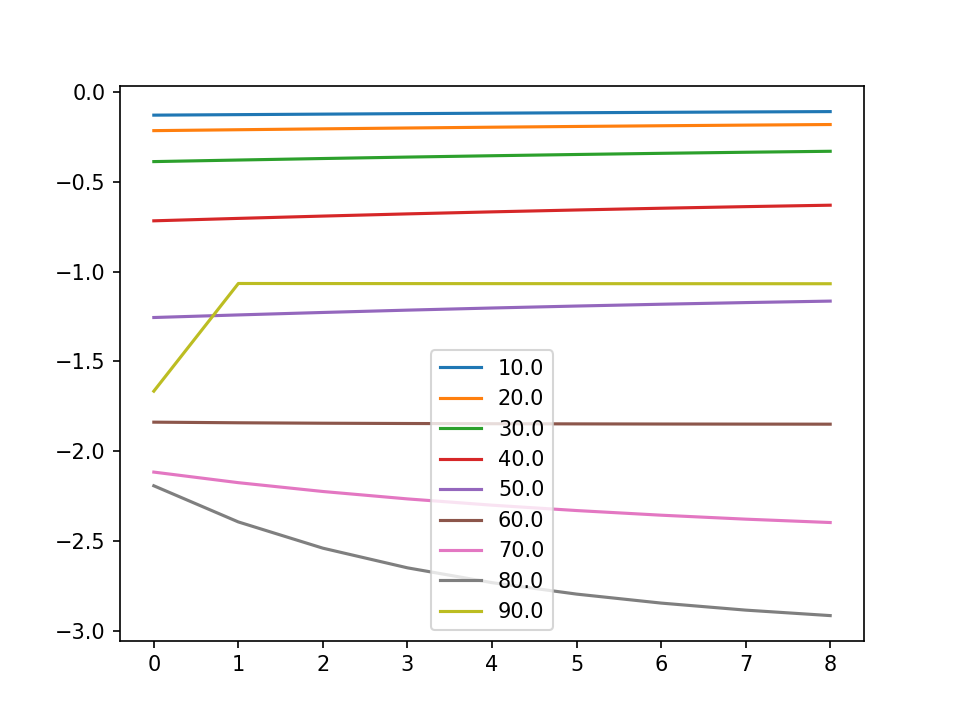

In [1042]:
plt.figure()
plt.plot(z_arr,oxa_pp[0,:,:].T,label=vza)
plt.legend()

<IPython.core.display.Javascript object>


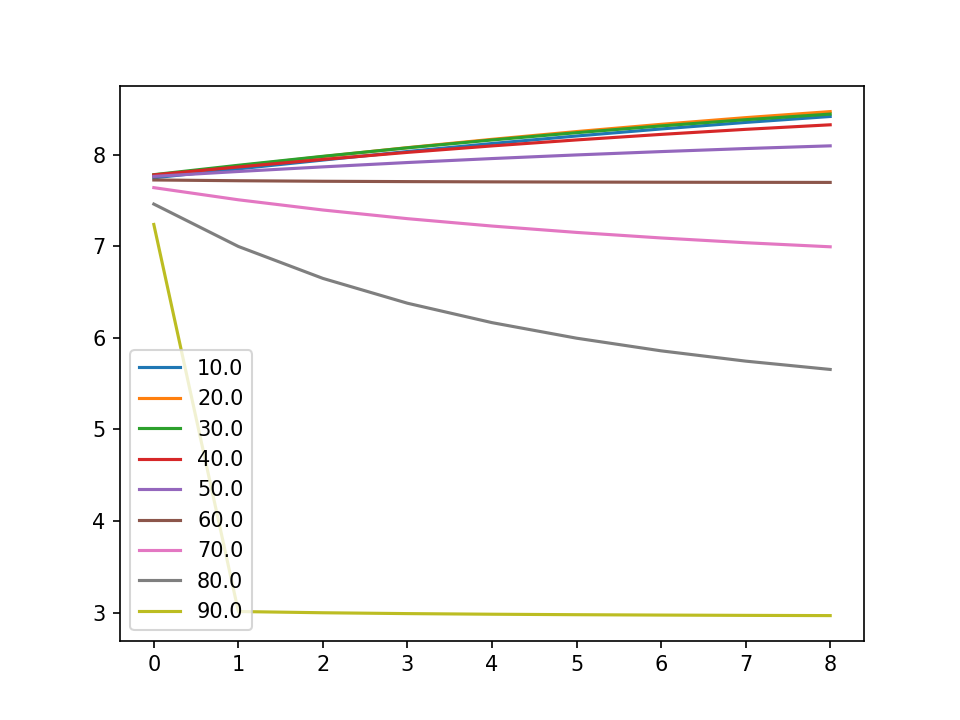

In [1043]:
plt.figure()
plt.plot(z_arr,oxa_pp[1,:,:].T,label=vza)
plt.legend()

<IPython.core.display.Javascript object>


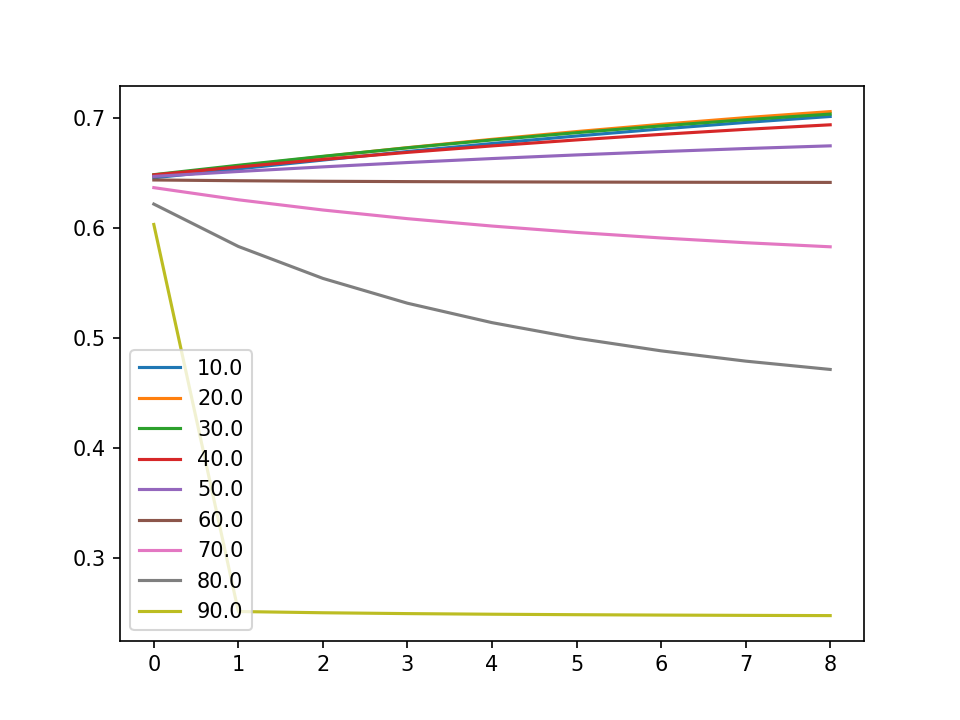

In [1044]:
plt.figure()
plt.plot(z_arr,oxa_pp[2,:,:].T,label=vza)
plt.legend()

<IPython.core.display.Javascript object>


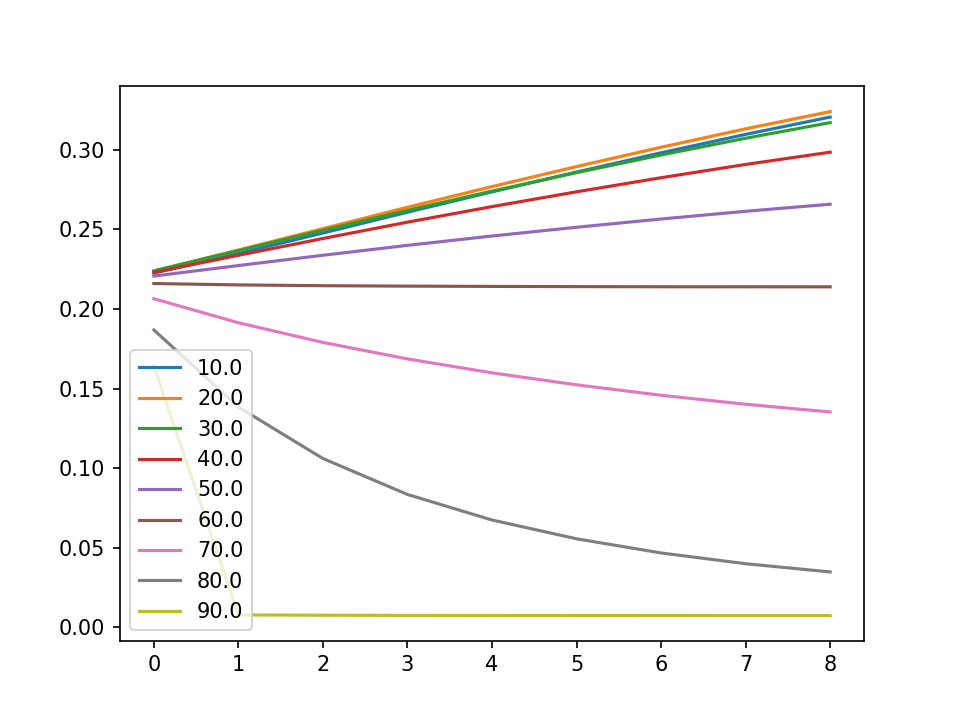

In [1045]:
plt.figure()
plt.plot(z_arr,oxa_pp[3,:,:].T,label=vza)
plt.legend()

<IPython.core.display.Javascript object>


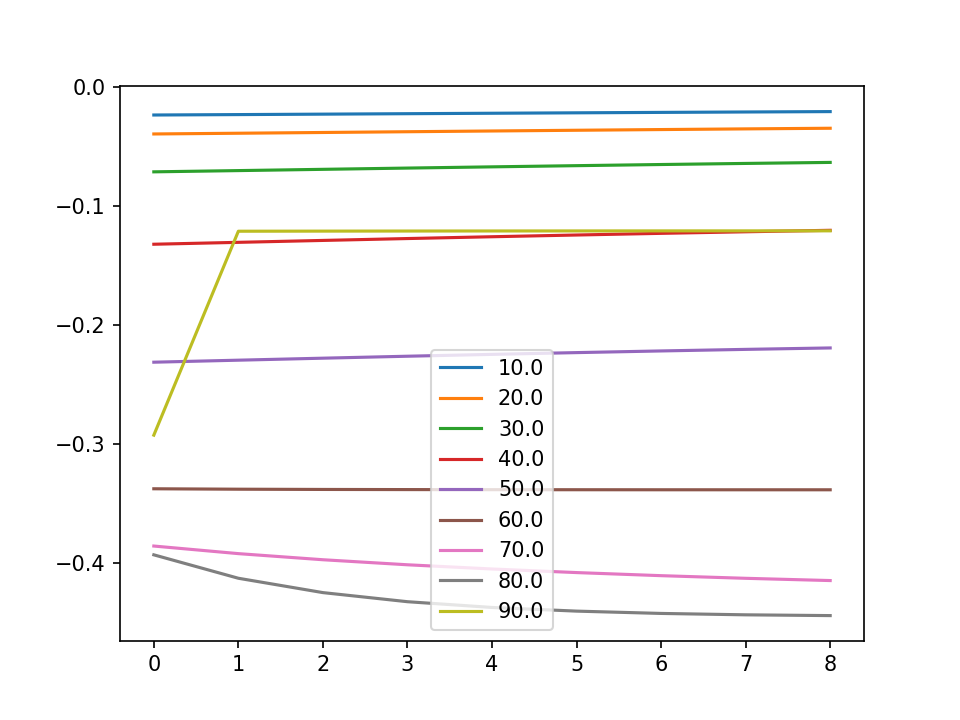

In [1046]:
plt.figure()
plt.plot(z_arr,oxa_pp[4,:,:].T,label=vza)
plt.legend()